## 1º Importar librerias


In [6]:
import pandas as pd

# 1.1 Carga y combina los DataFrames del Excel
file_path = 'customer-details.xlsx'
df_2012 = pd.read_excel(file_path, sheet_name='2012')
df_2013 = pd.read_excel(file_path, sheet_name='2013')
df_2014 = pd.read_excel(file_path, sheet_name='2014')
customer_details_df = pd.concat([df_2012, df_2013, df_2014], ignore_index=True)


In [7]:
# 1.2. Carga el DataFrame del CSV con el separador ','.
bank_df = pd.read_csv('bank-additional.csv', sep=',')


## 2º Limpieza 


#### Convertir todo a minusculas para evitar problemas 

In [8]:
# 2.1 Limpieza 
# Convertir a minúsculas para evitar problemas de mayúsculas/minúsculas
bank_df.columns = bank_df.columns.str.strip().str.lower()
customer_details_df.columns = customer_details_df.columns.str.strip().str.lower()



#### Problemas con la columna 'ID' .

In [9]:

# 1. Renombrar las columnas de ID antes de la unión
bank_df = bank_df.rename(columns={'id_': 'id'})
# En el customer_details_df, la columna 'id' ya está bien, no es necesario renombrarla

# 2. Convertir las columnas de ID a tipo string
customer_details_df['id'] = customer_details_df['id'].astype(str)
bank_df['id'] = bank_df['id'].astype(str)


#### Union de tablas en un unico 

In [10]:
# 2.3 se une los dos DataFrames en una.
# 'inner join' para asegurarnos de que solo se mantengan las filas que existen en ambos DataFrames.

merged_df = pd.merge(customer_details_df, bank_df, on='id', how='inner')
# Ahora, esta línea funcionará sin errores porque la columna 'id' ya existe
merged_df['id'] = merged_df['id'].str.upper()

# Puedes verificar que la columna 'id' existe imprimiendo las primeras filas
print(merged_df.head())


   unnamed: 0_x  income  kidhome  teenhome dt_customer  numwebvisitsmonth  \
0             0  161770        1         0  2012-04-04                 29   
1             1   85477        1         1  2012-12-30                  7   
2             2  147233        1         1  2012-02-02                  5   
3             3  121393        1         2  2012-12-21                 29   
4             4   63164        1         2  2012-06-20                 20   

                                     id  unnamed: 0_y   age        job  ...  \
0  089B39D8-E4D0-461B-87D4-814D71E0E079             0   NaN  housemaid  ...   
1  E9D37224-CB6F-4942-98D7-46672963D097             1  57.0   services  ...   
2  3F9F49B5-E410-4948-BF6E-F9244F04918B             2  37.0   services  ...   
3  9991FAFB-4447-451A-8BE2-B0DF6098D13E             3  40.0     admin.  ...   
4  ECA60B76-70B6-4077-80BA-BC52E8EBB0EB             4  56.0   services  ...   

      poutcome emp.var.rate  cons.price.idx  cons.conf.idx  eu

In [11]:
print("Información del DataFrame final después de la unión:")
merged_df.info()



Información del DataFrame final después de la unión:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   unnamed: 0_x       43000 non-null  int64         
 1   income             43000 non-null  int64         
 2   kidhome            43000 non-null  int64         
 3   teenhome           43000 non-null  int64         
 4   dt_customer        43000 non-null  datetime64[ns]
 5   numwebvisitsmonth  43000 non-null  int64         
 6   id                 43000 non-null  object        
 7   unnamed: 0_y       43000 non-null  int64         
 8   age                37880 non-null  float64       
 9   job                42655 non-null  object        
 10  marital            42915 non-null  object        
 11  education          41193 non-null  object        
 12  default            34019 non-null  float64       
 13  housing 

In [12]:

print("\nPrimeras 5 filas del DataFrame combinado:")
merged_df.head()



Primeras 5 filas del DataFrame combinado:


unnamed: 0_x  income  kidhome  teenhome dt_customer  numwebvisitsmonth  \
0             0  161770        1         0  2012-04-04                 29   
1             1   85477        1         1  2012-12-30                  7   
2             2  147233        1         1  2012-02-02                  5   
3             3  121393        1         2  2012-12-21                 29   
4             4   63164        1         2  2012-06-20                 20   

                                     id  unnamed: 0_y   age        job  ...  \
0  089B39D8-E4D0-461B-87D4-814D71E0E079             0   NaN  housemaid  ...   
1  E9D37224-CB6F-4942-98D7-46672963D097             1  57.0   services  ...   
2  3F9F49B5-E410-4948-BF6E-F9244F04918B             2  37.0   services  ...   
3  9991FAFB-4447-451A-8BE2-B0DF6098D13E             3  40.0     admin.  ...   
4  ECA60B76-70B6-4077-80BA-BC52E8EBB0EB             4  56.0   services  ...   

      poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  NONEXISTENT          1.1          93,994          -36,4      4,857   
1  NONEXISTENT          1.1          93,994          -36,4        NaN   
2  NONEXISTENT          1.1          93,994          -36,4      4,857   
3  NONEXISTENT          1.1          93,994          -36,4        NaN   
4  NONEXISTENT          1.1          93,994          -36,4        NaN   

  nr.employed   y                date  latitude  longitude  
0        5191  no       2-agosto-2019    41.495    -71.233  
1        5191  no  14-septiembre-2016    34.601    -83.923  
2        5191  no     15-febrero-2019    34.939    -94.847  
3        5191  no   29-noviembre-2015    49.041    -70.308  
4        5191  no       29-enero-2017    38.033   -104.463  

[5 rows x 30 columns]

In [13]:
# Nueva columna con valores que era nulos 
merged_df['was_age_nan'] = merged_df['age'].isna()
merged_df['age'] = merged_df['age'].fillna(merged_df['age'].median())


In [14]:
# Modificar columnas que fueran cadenas de texto

merged_df['id'] = merged_df['id'].str.upper()


In [15]:
merged_df.head()


unnamed: 0_x  income  kidhome  teenhome dt_customer  numwebvisitsmonth  \
0             0  161770        1         0  2012-04-04                 29   
1             1   85477        1         1  2012-12-30                  7   
2             2  147233        1         1  2012-02-02                  5   
3             3  121393        1         2  2012-12-21                 29   
4             4   63164        1         2  2012-06-20                 20   

                                     id  unnamed: 0_y   age        job  ...  \
0  089B39D8-E4D0-461B-87D4-814D71E0E079             0  38.0  housemaid  ...   
1  E9D37224-CB6F-4942-98D7-46672963D097             1  57.0   services  ...   
2  3F9F49B5-E410-4948-BF6E-F9244F04918B             2  37.0   services  ...   
3  9991FAFB-4447-451A-8BE2-B0DF6098D13E             3  40.0     admin.  ...   
4  ECA60B76-70B6-4077-80BA-BC52E8EBB0EB             4  56.0   services  ...   

  emp.var.rate cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  \
0          1.1         93,994          -36,4      4,857         5191  no   
1          1.1         93,994          -36,4        NaN         5191  no   
2          1.1         93,994          -36,4      4,857         5191  no   
3          1.1         93,994          -36,4        NaN         5191  no   
4          1.1         93,994          -36,4        NaN         5191  no   

                 date  latitude  longitude  was_age_nan  
0       2-agosto-2019    41.495    -71.233         True  
1  14-septiembre-2016    34.601    -83.923        False  
2     15-febrero-2019    34.939    -94.847        False  
3   29-noviembre-2015    49.041    -70.308        False  
4       29-enero-2017    38.033   -104.463        False  

[5 rows x 31 columns]

## 3ºDuplicados

In [16]:
merged_df[merged_df.duplicated()]

Empty DataFrame
Columns: [unnamed: 0_x, income, kidhome, teenhome, dt_customer, numwebvisitsmonth, id, unnamed: 0_y, age, job, marital, education, default, housing, loan, contact, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y, date, latitude, longitude, was_age_nan]
Index: []

[0 rows x 31 columns]

In [17]:
merged_df['id'].duplicated().sum()


np.int64(0)

In [18]:
merged_df.drop(columns='id').duplicated().sum()

np.int64(0)

## 4º Análisis Estadístico

In [19]:
#columnas de tipo de dato numerico
merged_df.describe().T.round(2)

count                           mean  \
unnamed: 0_x       43000.0                     7935.47893   
income             43000.0                    93241.20007   
kidhome            43000.0                       1.004791   
teenhome           43000.0                       0.998605   
dt_customer          43000  2013-05-12 07:05:06.083720960   
numwebvisitsmonth  43000.0                      16.589698   
unnamed: 0_y       43000.0                   20651.099047   
age                43000.0                      39.741698   
default            34019.0                       0.000088   
housing            41974.0                       0.535998   
loan               41974.0                        0.15562   
duration           43000.0                     257.739279   
campaign           43000.0                       2.567233   
pdays              43000.0                     962.330953   
previous           43000.0                       0.174023   
emp.var.rate       43000.0                       0.077128   
latitude           43000.0                      36.856697   
longitude          43000.0                     -95.939067   

                                   min                  25%  \
unnamed: 0_x                       0.0               3615.0   
income                          5841.0              49610.0   
kidhome                            0.0                  0.0   
teenhome                           0.0                  0.0   
dt_customer        2012-01-01 00:00:00  2012-07-16 00:00:00   
numwebvisitsmonth                  1.0                  9.0   
unnamed: 0_y                       0.0             10381.75   
age                               17.0                 33.0   
default                            0.0                  0.0   
housing                            0.0                  0.0   
loan                               0.0                  0.0   
duration                           0.0                102.0   
campaign                           1.0                  1.0   
pdays                              0.0                999.0   
previous                           0.0                  0.0   
emp.var.rate                      -3.4                 -1.8   
latitude                        24.396             30.61475   
longitude                     -124.997           -110.49425   

                                   50%                  75%  \
unnamed: 0_x                    7222.0             11725.25   
income                         93050.5             136744.5   
kidhome                            1.0                  2.0   
teenhome                           1.0                  2.0   
dt_customer        2013-03-02 00:00:00  2014-03-29 00:00:00   
numwebvisitsmonth                 17.0                 25.0   
unnamed: 0_y                   20642.5             30930.25   
age                               38.0                 46.0   
default                            0.0                  0.0   
housing                            1.0                  1.0   
loan                               0.0                  0.0   
duration                         179.0                319.0   
campaign                           2.0                  3.0   
pdays                            999.0                999.0   
previous                           0.0                  0.0   
emp.var.rate                       1.1                  1.4   
latitude                        36.761             43.11325   
longitude                     -95.8995            -81.42775   

                                   max           std  
unnamed: 0_x                   20114.0   5225.658105  
income                        180802.0  50498.316182  
kidhome                            2.0      0.815913  
teenhome                           2.0      0.815983  
dt_customer        2014-12-31 00:00:00           NaN  
numwebvisitsmonth                 32.0      9.239205  
unnamed: 0_y                   41187.0  11868.770913  
age                      

In [20]:
# variables categóricas

merged_df.describe(include='object').T.round(2)

count unique                                   top   freq
id              43000  43000  089B39D8-E4D0-461B-87D4-814D71E0E079      1
job             42655     11                                admin.  10873
marital         42915      3                               MARRIED  25999
education       41193      7                     university.degree  12722
contact         43000      2                              cellular  27396
poutcome        43000      3                           NONEXISTENT  37103
cons.price.idx  42529     26                                93,994   7938
cons.conf.idx   43000     26                                 -36,4   8020
euribor3m       33744    309                                 4,857   2287
nr.employed     43000     11                                5228,1  16980
y               43000      2                                    no  38156
date            42752   1825                       28-febrero-2018     95

In [21]:
# categorias dentro de esta variable 
# .unique

merged_df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', nan,
       'entrepreneur', 'student'], dtype=object)

In [22]:
merged_df['job'].value_counts()

job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Name: count, dtype: int64

In [23]:
# Analisis de frecuencia en %

merged_df['job'].value_counts(normalize=True)


job
admin.           0.254906
blue-collar      0.226328
technician       0.164717
services         0.097574
management       0.071504
retired          0.041965
entrepreneur     0.035682
self-employed    0.034908
housemaid        0.026328
unemployed       0.024921
student          0.021170
Name: proportion, dtype: float64

In [24]:
# Muestra fila adicional con valores nulos

merged_df['job'].value_counts(dropna=False)

job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
NaN                345
Name: count, dtype: int64

In [25]:
# Muestra TODOS los valores nulos 
merged_df.isnull().sum()

unnamed: 0_x            0
income                  0
kidhome                 0
teenhome                0
dt_customer             0
numwebvisitsmonth       0
id                      0
unnamed: 0_y            0
age                     0
job                   345
marital                85
education            1807
default              8981
housing              1026
loan                 1026
contact                 0
duration                0
campaign                0
pdays                   0
previous                0
poutcome                0
emp.var.rate            0
cons.price.idx        471
cons.conf.idx           0
euribor3m            9256
nr.employed             0
y                       0
date                  248
latitude                0
longitude               0
was_age_nan             0
dtype: int64

### Columnas categóricas 

In [26]:
# Agrupar columnas categóricas

col_cat = merged_df.select_dtypes(include='object').columns

In [27]:
col_cat


Index(['id', 'job', 'marital', 'education', 'contact', 'poutcome',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'date'],
      dtype='object')

In [28]:
for columna in col_cat:
    display(merged_df[columna].value_counts(dropna=False))


id
089B39D8-E4D0-461B-87D4-814D71E0E079    1
E9D37224-CB6F-4942-98D7-46672963D097    1
3F9F49B5-E410-4948-BF6E-F9244F04918B    1
9991FAFB-4447-451A-8BE2-B0DF6098D13E    1
ECA60B76-70B6-4077-80BA-BC52E8EBB0EB    1
                                       ..
4EED05DE-2A98-4227-B488-32122009B638    1
0F0ACA88-4088-4FE2-905F-44FB675D9493    1
CADADD4B-7EE5-4019-B13A-CA01BB67CA5B    1
5F432048-D515-4BB5-9C94-62DB451F88D4    1
993BBBD6-4DBC-4A40-A408-F91F8462BEE6    1
Name: count, Length: 43000, dtype: int64

job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
NaN                345
Name: count, dtype: int64

marital
MARRIED     25999
SINGLE      12105
DIVORCED     4811
NaN            85
Name: count, dtype: int64

education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
NaN                     1807
illiterate                18
Name: count, dtype: int64

contact
cellular     27396
telephone    15604
Name: count, dtype: int64

poutcome
NONEXISTENT    37103
FAILURE         4461
SUCCESS         1436
Name: count, dtype: int64

cons.price.idx
93,994    7938
93,918    6937
92,893    5985
93,444    5349
94,465    4522
93,2      3731
93,075    2552
92,201     803
92,963     742
NaN        471
92,431     471
92,649     375
94,215     320
94,199     316
92,843     298
92,379     274
93,369     271
94,027     242
94,055     236
93,876     224
94,601     212
92,469     184
92,713     179
93,749     179
94,767     130
93,798      48
92,756      11
Name: count, dtype: int64

cons.conf.idx
-36,4    8020
-42,7    7004
-46,2    6057
-36,1    5408
-41,8    4568
-42      3782
-47,1    2581
-31,4     815
-40,8     748
-26,9     477
-30,1     379
-40,3     328
-37,5     318
-50       299
-29,8     277
-34,8     275
-38,3     245
-39,8     239
-40       225
-49,5     214
-33,6     185
-34,6     183
-33       181
-50,8     133
-40,4      48
-45,9      11
Name: count, dtype: int64

euribor3m
NaN      9256
4,857    2287
4,962    2124
4,963    2019
4,961    1594
         ... 
5,045       1
4,921       1
0,956       1
0,894       1
0,953       1
Name: count, Length: 310, dtype: int64

nr.employed
5228,1    16980
5099,1     8937
5191       8020
5195,8     3830
5076,2     1748
5017,5     1133
4991,6      812
5008,7      683
4963,6      665
5023,5      181
5176,3       11
Name: count, dtype: int64

y
no     38156
yes     4844
Name: count, dtype: int64

date
NaN                  248
28-febrero-2018       95
28-febrero-2016       94
28-febrero-2015       92
28-febrero-2017       89
                    ... 
17-diciembre-2018     11
21-diciembre-2019     10
4-abril-2017          10
20-noviembre-2015     10
14-abril-2015         10
Name: count, Length: 1826, dtype: int64

In [29]:
#Este codigo me da error por que la columna de 'id'es un identificador unico
###  for columna in col_cat:
#print(f'Estamos viendo la columna {columna} que tiene {merged_df[columna].nunique()} categorías')   
#display(merged_df[columna].value_counts(dropna=False)) ##

# 1. Obtenemos todas las columnas de tipo 'object' (categóricas)
col_cat = merged_df.select_dtypes(include='object').columns

# 2. Convertimos la lista de columnas a una lista de Python para poder filtrarla
col_cat_list = col_cat.to_list()

# 3. Eliminamos 'id' de la lista
# Usamos una comprensión de listas para crear una nueva lista sin 'id'
cols_cat_limpias = [columna for columna in col_cat_list if columna != 'id']

# 4. Ahora recorre la lista limpia de columnas categóricas
for columna in cols_cat_limpias:
    print(f'Estamos viendo la columna {columna} que tiene {merged_df[columna].nunique()} categorías')
    display(merged_df[columna].value_counts(dropna=False))


Estamos viendo la columna job que tiene 11 categorías


job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
NaN                345
Name: count, dtype: int64

Estamos viendo la columna marital que tiene 3 categorías


marital
MARRIED     25999
SINGLE      12105
DIVORCED     4811
NaN            85
Name: count, dtype: int64

Estamos viendo la columna education que tiene 7 categorías


education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
NaN                     1807
illiterate                18
Name: count, dtype: int64

Estamos viendo la columna contact que tiene 2 categorías


contact
cellular     27396
telephone    15604
Name: count, dtype: int64

Estamos viendo la columna poutcome que tiene 3 categorías


poutcome
NONEXISTENT    37103
FAILURE         4461
SUCCESS         1436
Name: count, dtype: int64

Estamos viendo la columna cons.price.idx que tiene 26 categorías


cons.price.idx
93,994    7938
93,918    6937
92,893    5985
93,444    5349
94,465    4522
93,2      3731
93,075    2552
92,201     803
92,963     742
NaN        471
92,431     471
92,649     375
94,215     320
94,199     316
92,843     298
92,379     274
93,369     271
94,027     242
94,055     236
93,876     224
94,601     212
92,469     184
92,713     179
93,749     179
94,767     130
93,798      48
92,756      11
Name: count, dtype: int64

Estamos viendo la columna cons.conf.idx que tiene 26 categorías


cons.conf.idx
-36,4    8020
-42,7    7004
-46,2    6057
-36,1    5408
-41,8    4568
-42      3782
-47,1    2581
-31,4     815
-40,8     748
-26,9     477
-30,1     379
-40,3     328
-37,5     318
-50       299
-29,8     277
-34,8     275
-38,3     245
-39,8     239
-40       225
-49,5     214
-33,6     185
-34,6     183
-33       181
-50,8     133
-40,4      48
-45,9      11
Name: count, dtype: int64

Estamos viendo la columna euribor3m que tiene 309 categorías


euribor3m
NaN      9256
4,857    2287
4,962    2124
4,963    2019
4,961    1594
         ... 
5,045       1
4,921       1
0,956       1
0,894       1
0,953       1
Name: count, Length: 310, dtype: int64

Estamos viendo la columna nr.employed que tiene 11 categorías


nr.employed
5228,1    16980
5099,1     8937
5191       8020
5195,8     3830
5076,2     1748
5017,5     1133
4991,6      812
5008,7      683
4963,6      665
5023,5      181
5176,3       11
Name: count, dtype: int64

Estamos viendo la columna y que tiene 2 categorías


y
no     38156
yes     4844
Name: count, dtype: int64

Estamos viendo la columna date que tiene 1825 categorías


date
NaN                  248
28-febrero-2018       95
28-febrero-2016       94
28-febrero-2015       92
28-febrero-2017       89
                    ... 
17-diciembre-2018     11
21-diciembre-2019     10
4-abril-2017          10
20-noviembre-2015     10
14-abril-2015         10
Name: count, Length: 1826, dtype: int64

## 5º Visualizaciones(barras)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
merged_df['education'].value_counts().index

Index(['university.degree', 'high.school', 'basic.9y', 'professional.course',
       'basic.4y', 'basic.6y', 'illiterate'],
      dtype='object', name='education')

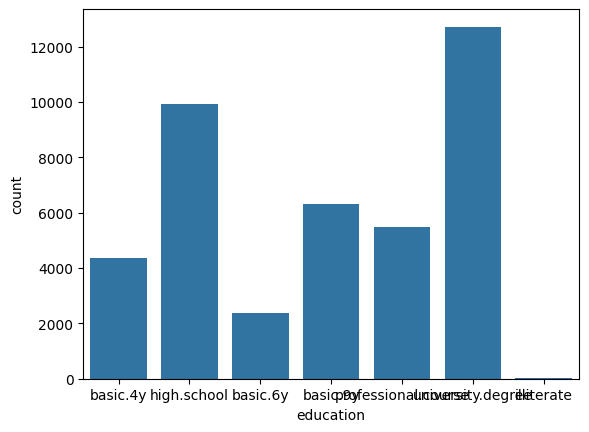

In [32]:
merged_df = pd.read_csv('bank-additional.csv')
plt.figure()
sns.countplot(data=merged_df, x='education')
plt.show()



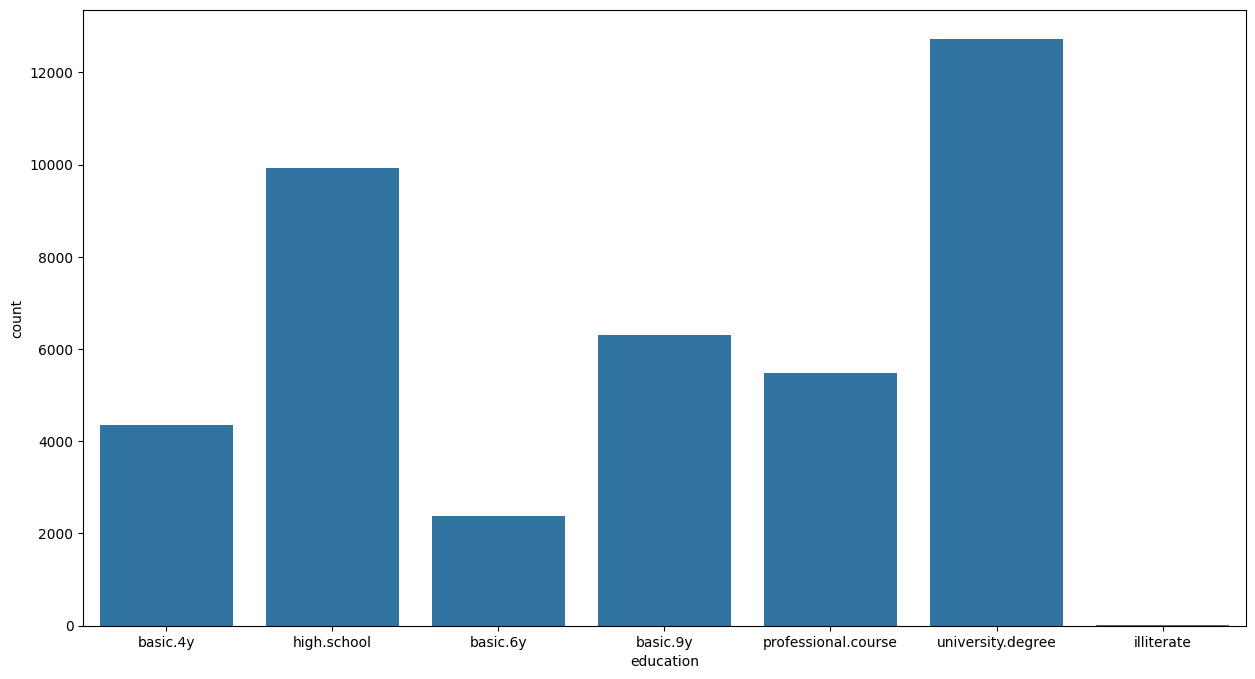

In [33]:
plt.figure(figsize=(15, 8)) # <-- Aumenta el ancho y alto del gráfico

sns.countplot(data=merged_df, x=merged_df['education'])

plt.show()

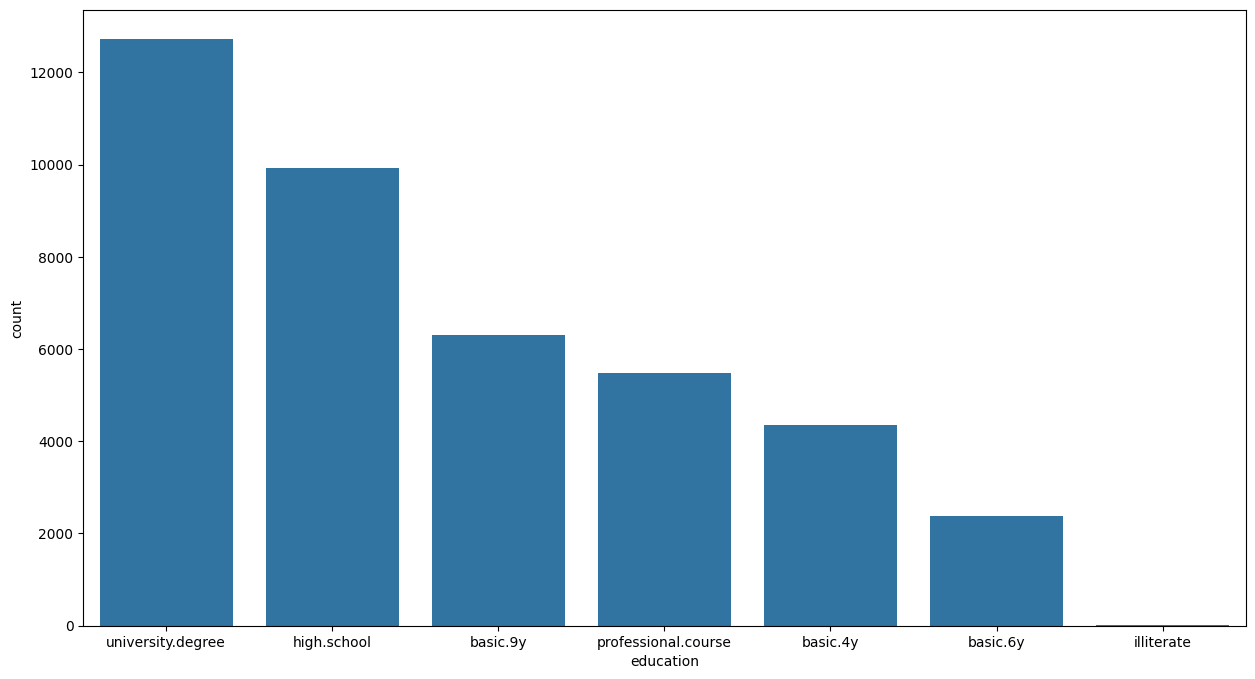

In [34]:
#Ordenar 
plt.figure(figsize=(15, 8)) 

sns.countplot(data=merged_df, x='education', order=merged_df['education'].value_counts().index)

plt.show()

## PLOtly


## Columnas numericas


In [35]:
col_num = merged_df.select_dtypes(include='number').columns


In [36]:
col_num


Index(['Unnamed: 0', 'age', 'default', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'previous', 'emp.var.rate', 'latitude',
       'longitude'],
      dtype='object')

### Visualización(histograma)


In [37]:
Edad = merged_df['age'].value_counts().iloc[1:].reset_index()

Edad


age  count
0   33.0   1704
1   32.0   1672
2   36.0   1649
3   34.0   1608
4   30.0   1605
..   ...    ...
72  91.0      2
73  98.0      2
74  95.0      1
75  87.0      1
76  94.0      1

[77 rows x 2 columns]

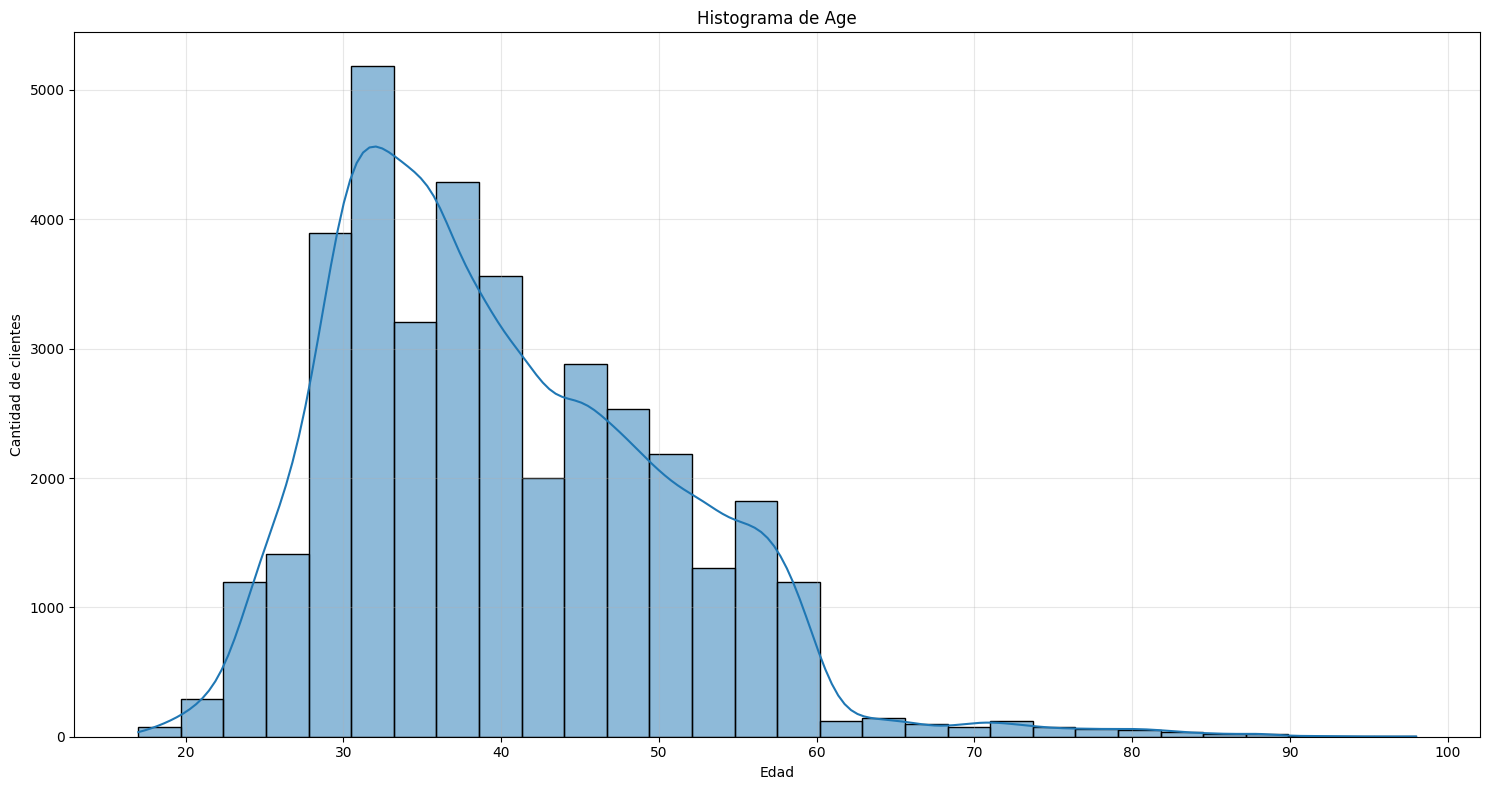

In [38]:
plt.figure(figsize=(15, 8))

sns.histplot(data=merged_df, x='age', bins=30, kde=True)



plt.title('Histograma de Age')
plt.xlabel('Edad')
plt.ylabel('Cantidad de clientes')
plt.grid(alpha=0.3)
plt.tight_layout()


plt.show()


## Matriz de correlación

In [39]:
import numpy as np


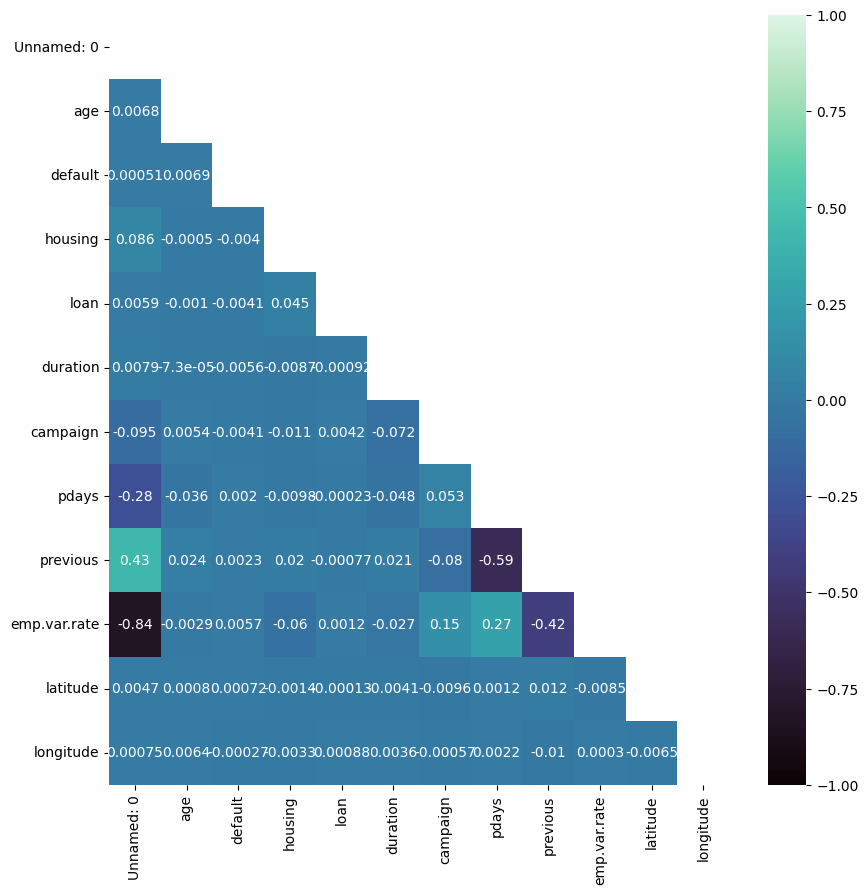

In [40]:
matriz_corr = merged_df.corr(numeric_only=True)

plt.figure(figsize=(10, 10))

mask = np.triu(np.ones_like(matriz_corr, dtype=bool))

sns.heatmap(matriz_corr, annot=True, vmax=1, vmin=-1, cmap='mako', mask=mask)

plt.show()


## Relaciones cruzadas


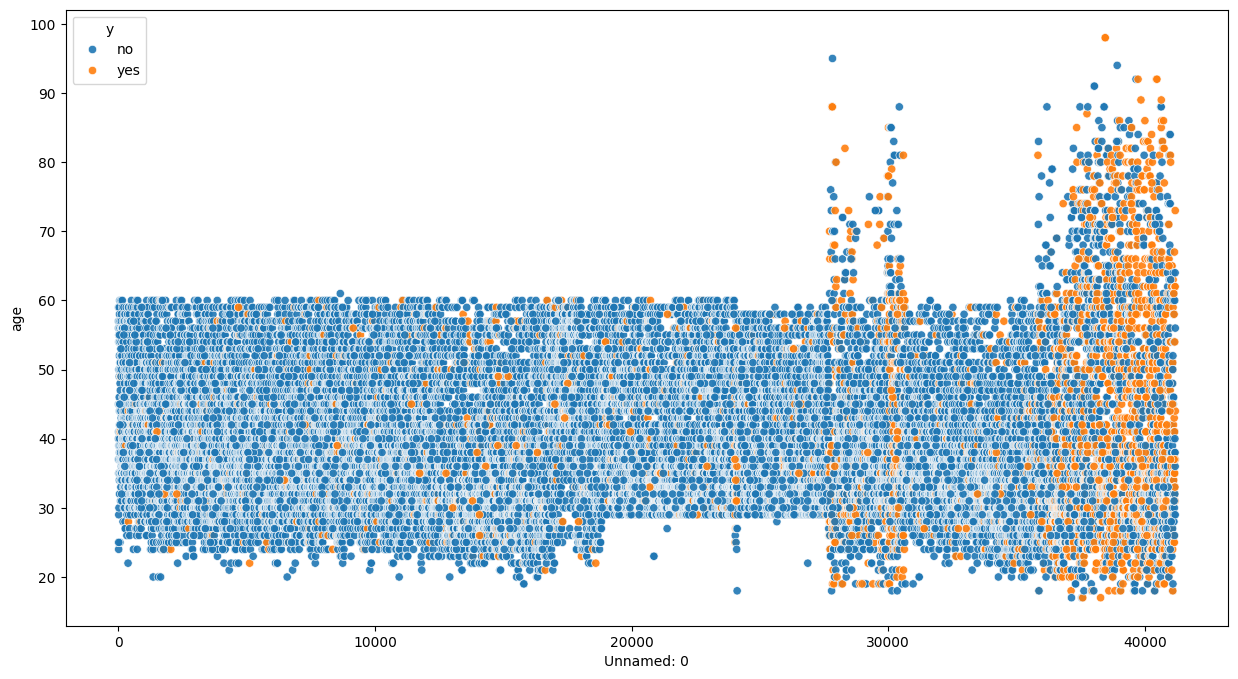

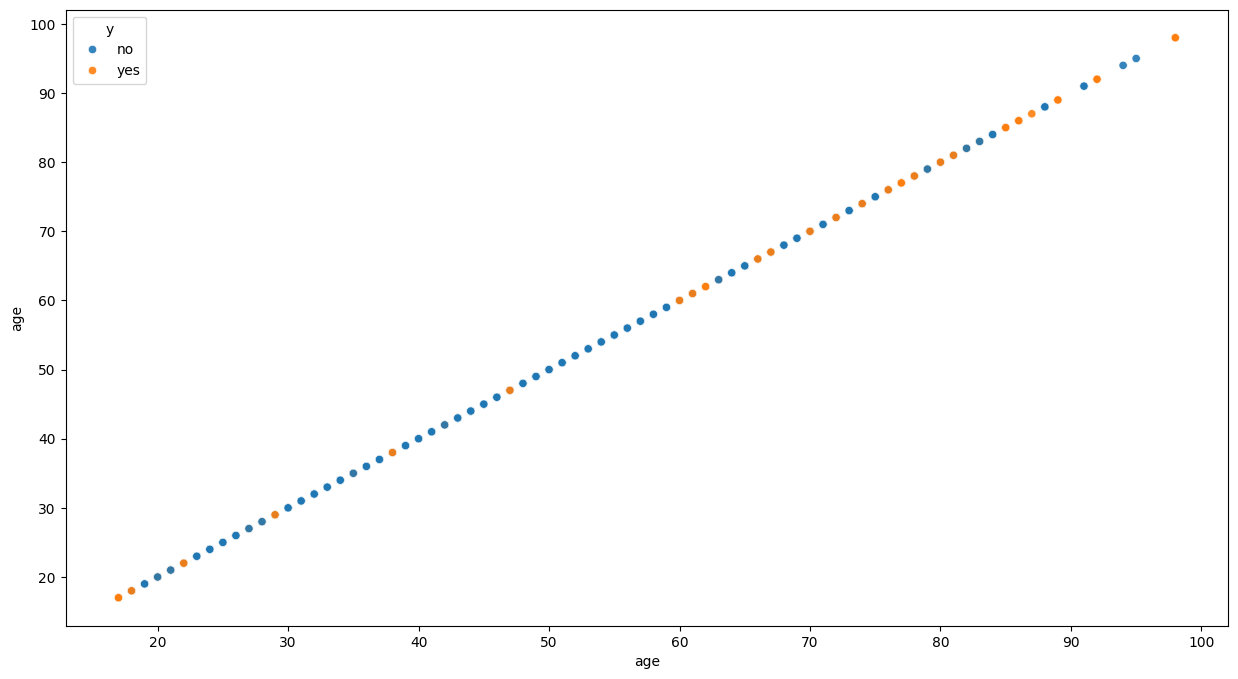

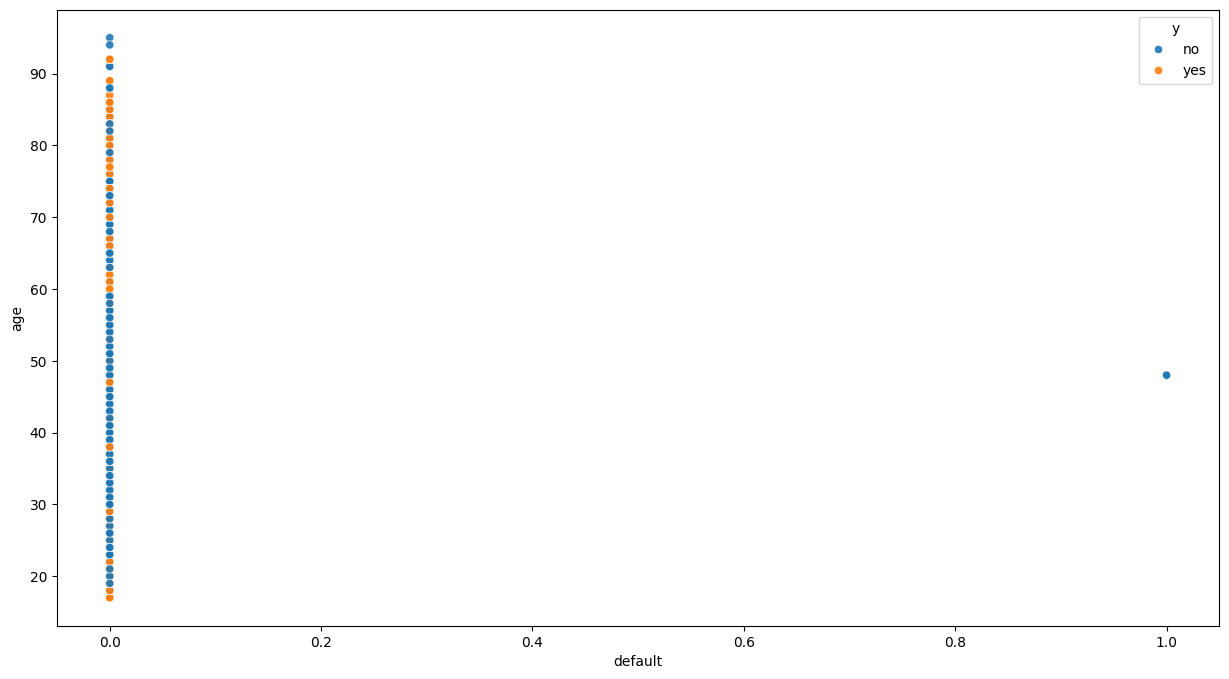

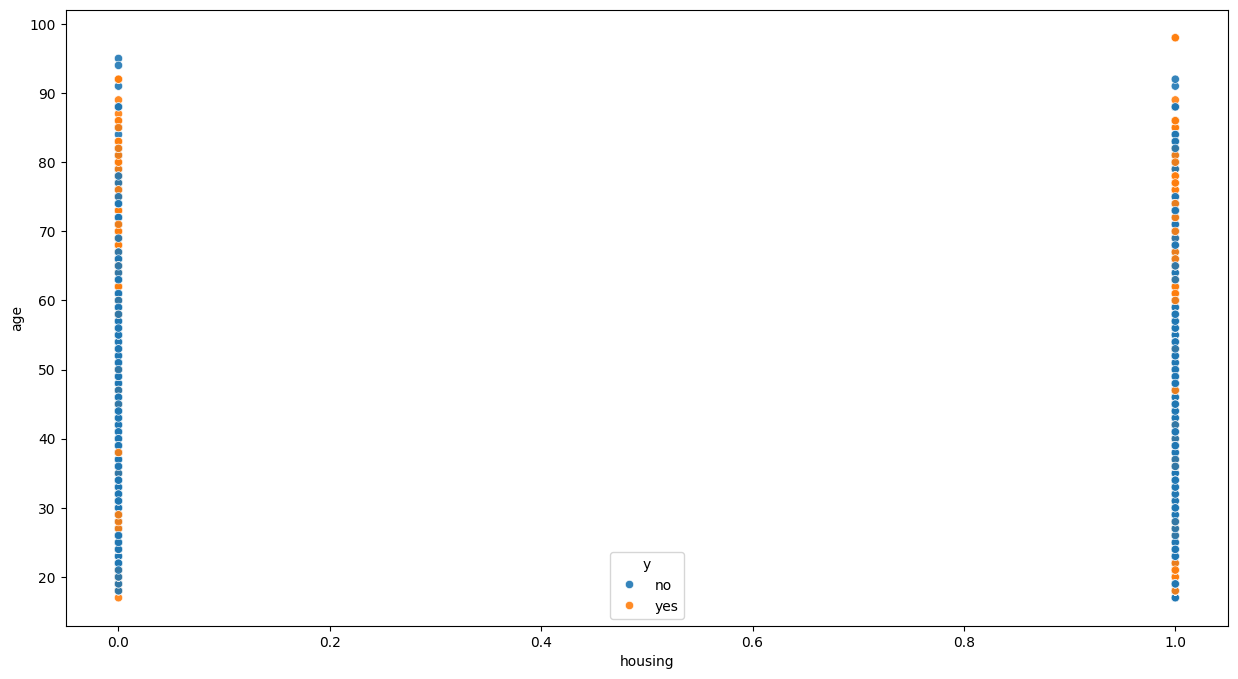

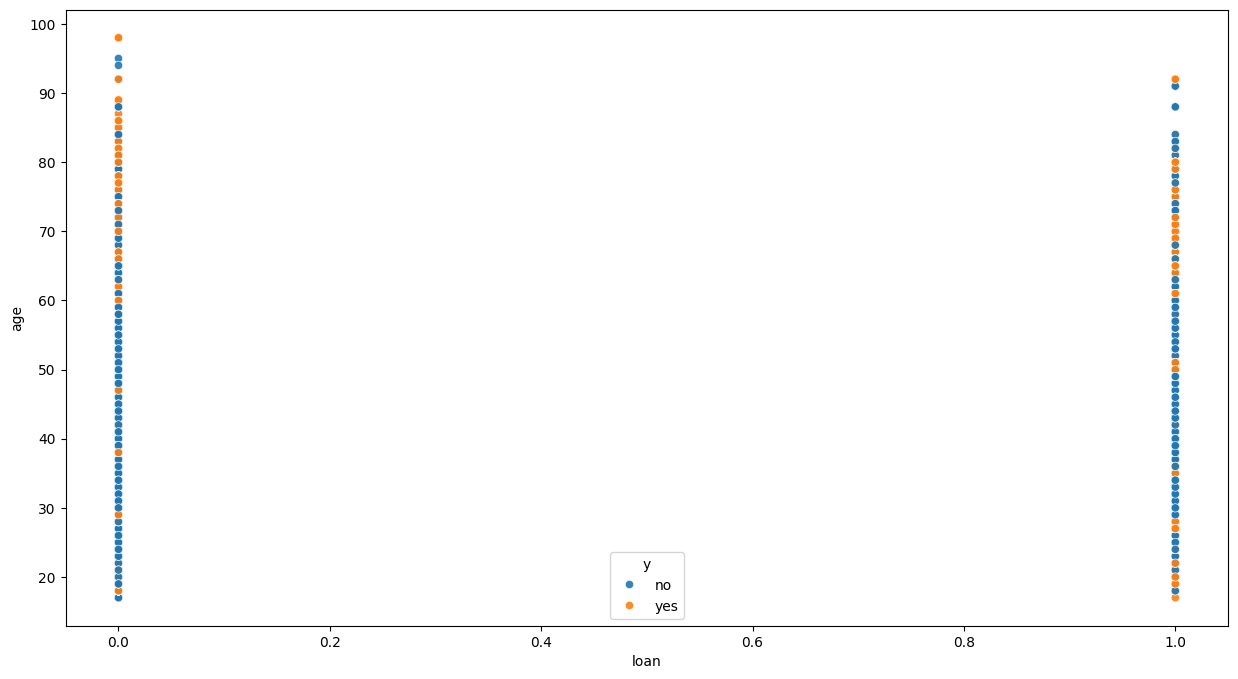

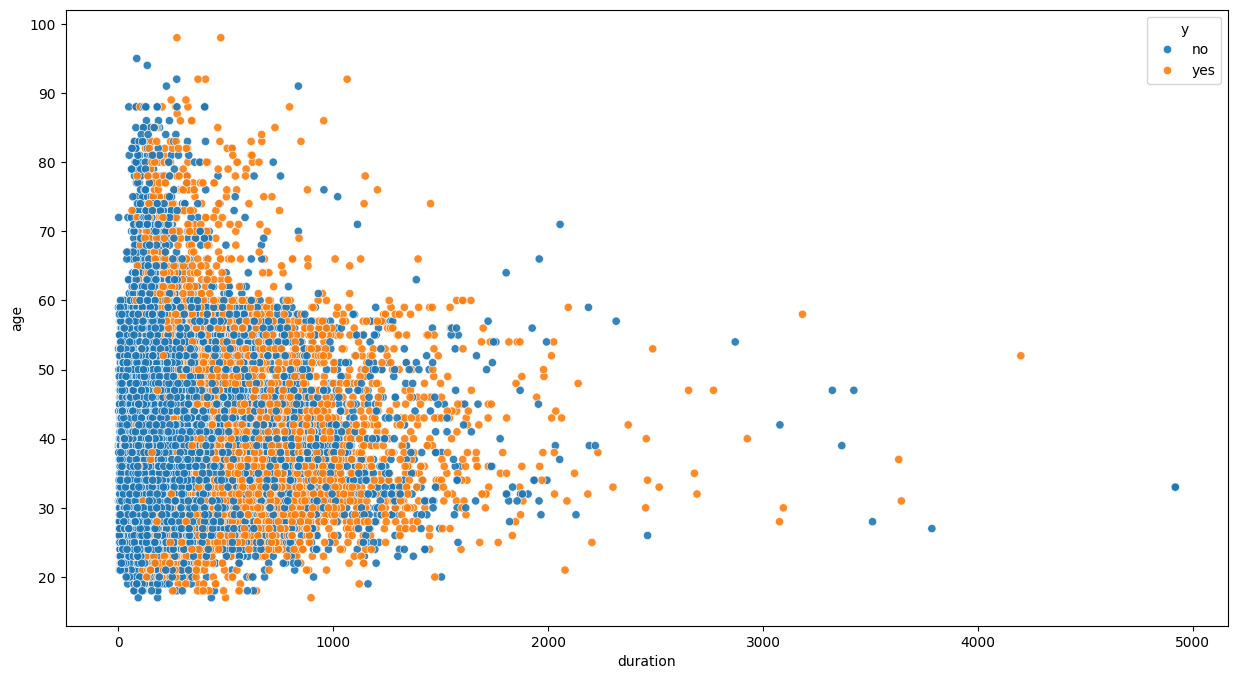

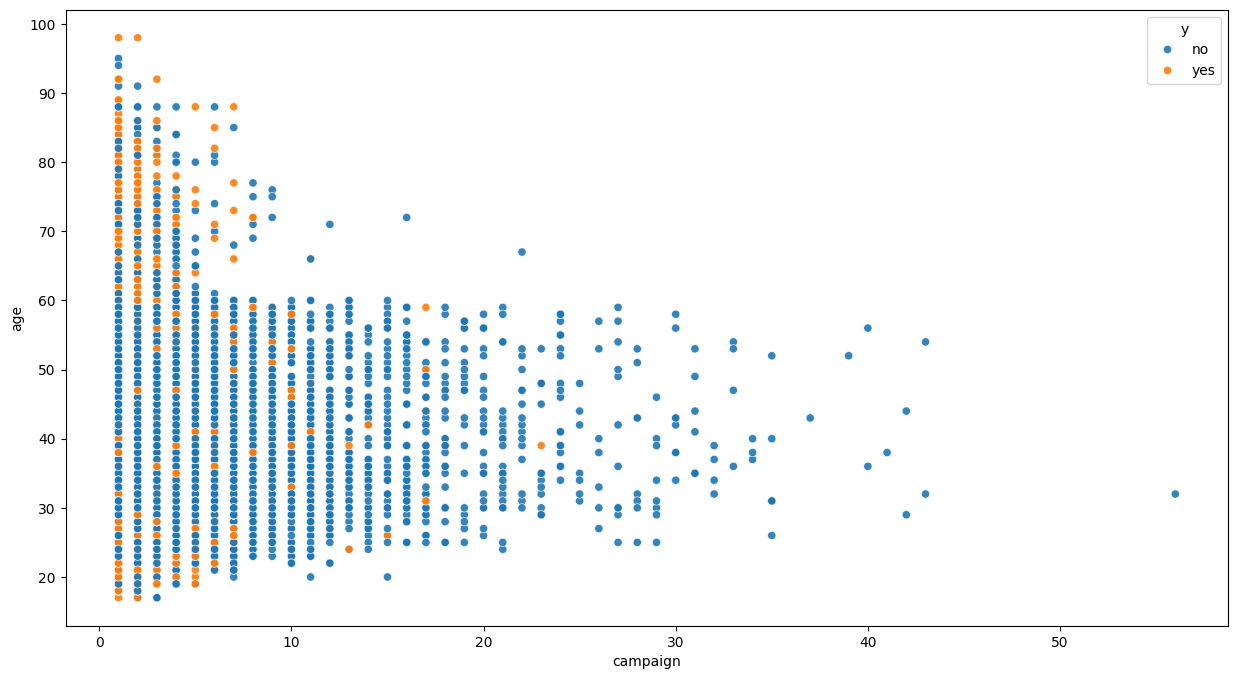

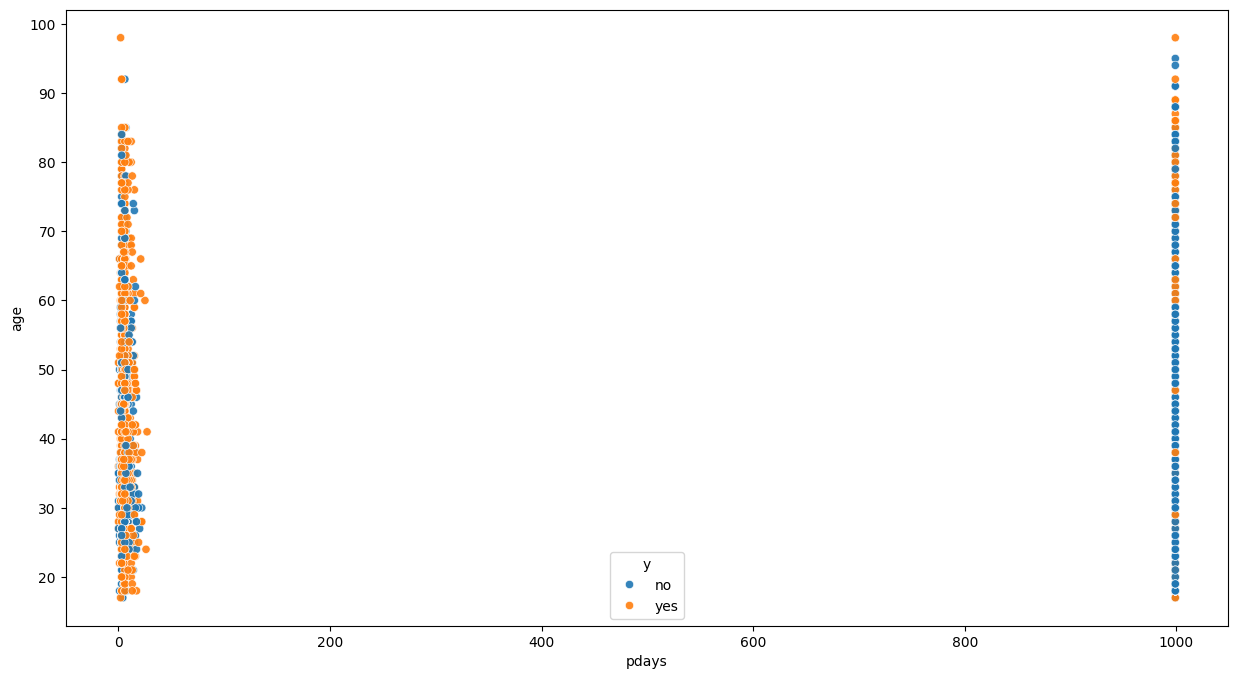

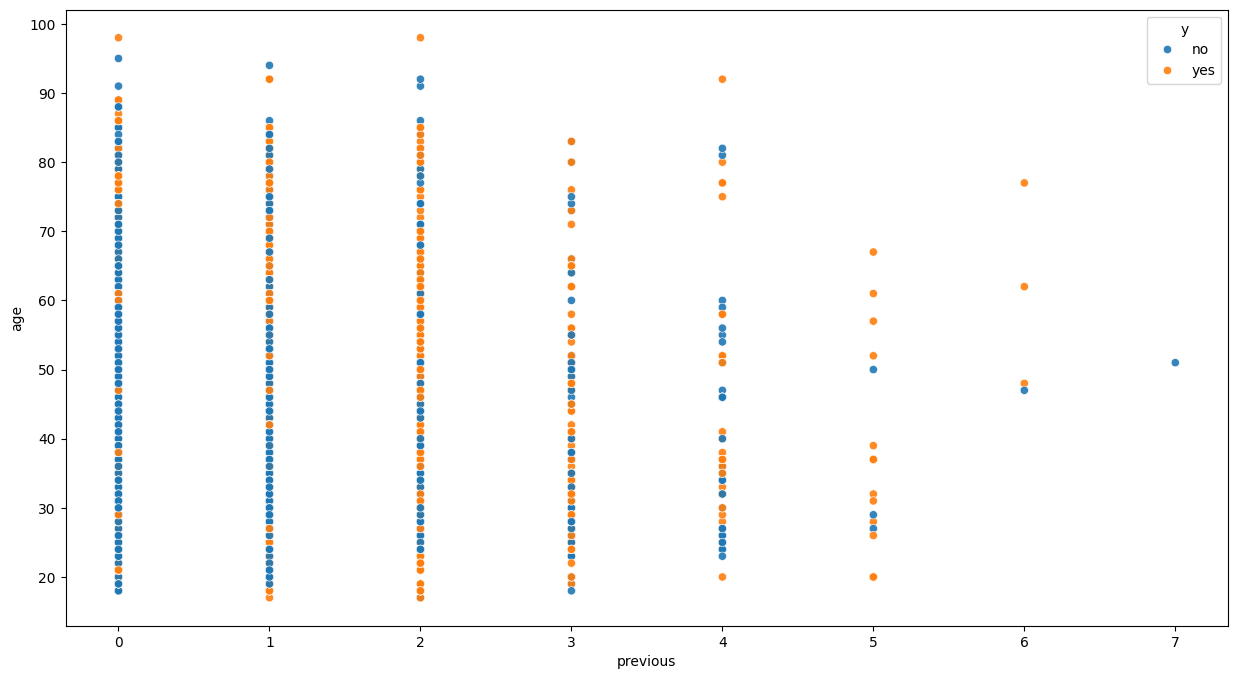

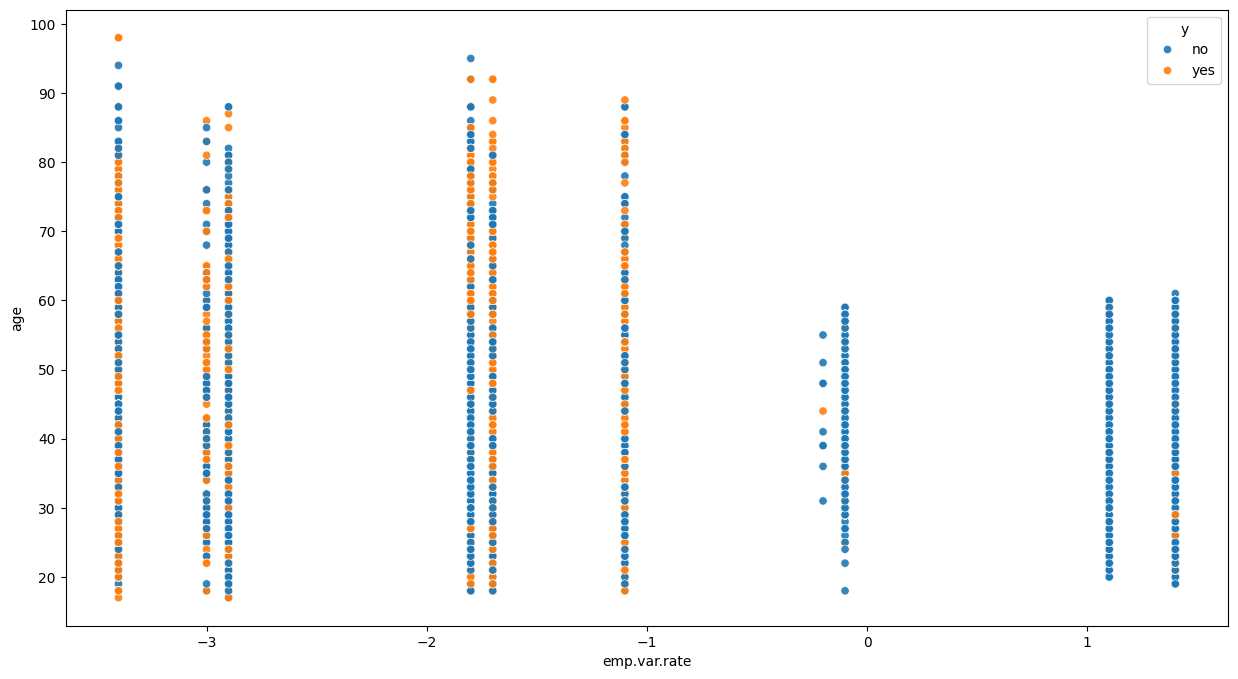

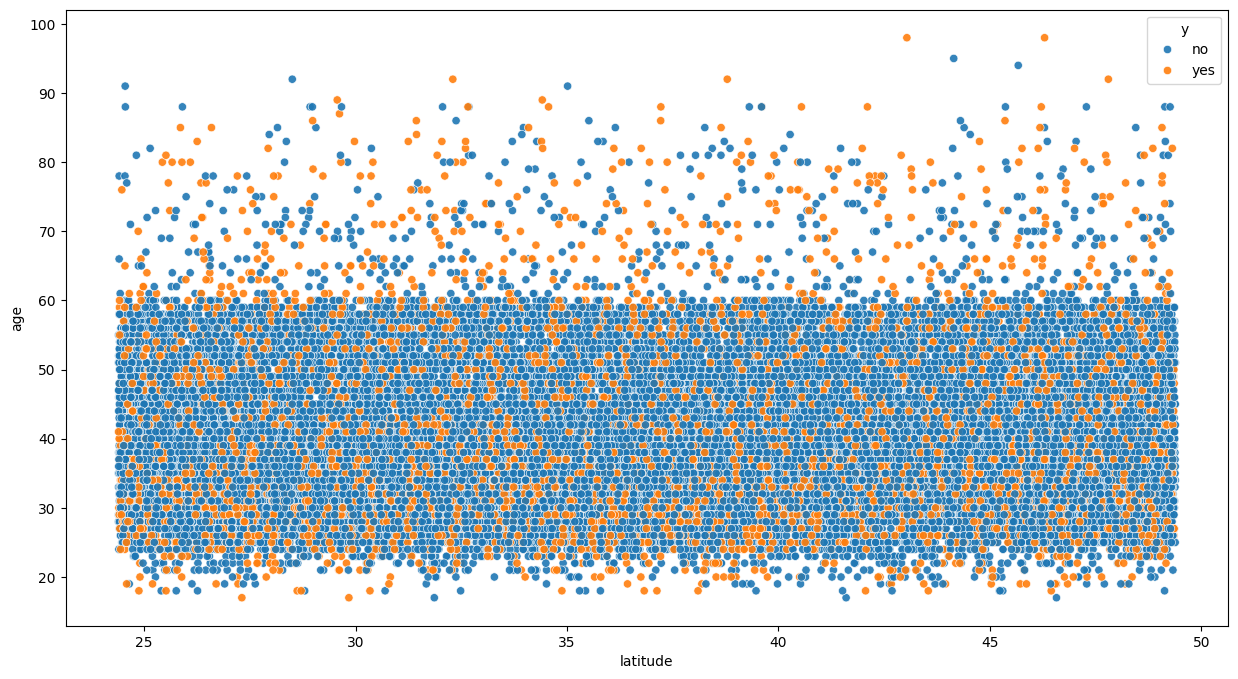

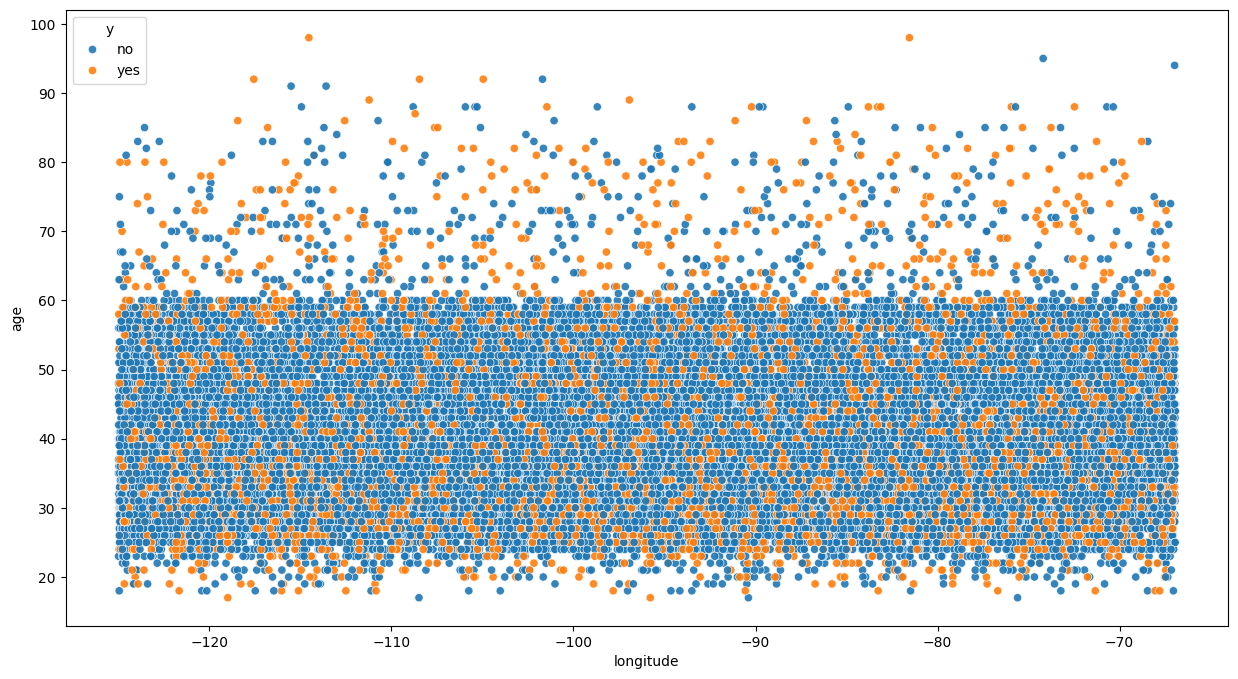

In [41]:
columna = 'age'

cols_num = merged_df.select_dtypes(include='number').columns

# Generar gráficos de dispersión
for col in cols_num:

    plt.figure(figsize=(15, 8))
    sns.scatterplot(x=merged_df[col], y=merged_df[columna], hue=merged_df['y'], alpha=0.9)

    plt.show()

    
    


In [42]:

filtro = (merged_df['duration'] > 1000) & (merged_df['y'] == 'no')

df_filtrado = merged_df[filtro]

df_filtrado[['duration', 'age', 'campaign']].sort_values(by='duration')

duration   age  campaign
32878      1001   NaN         4
1903       1002  42.0         5
38835      1002  38.0         3
5176       1003  50.0         1
8847       1005  50.0         2
...         ...   ...       ...
19535      3422  47.0         1
35899      3509  28.0         2
40370      3785  27.0         1
23969      4918  33.0         1
42131      4918  33.0         1

[403 rows x 3 columns]

### Vs columnas categóricas

In [43]:
# Crea una lista manual de las columnas que sabes que son categóricas
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y', 'contact_month', 'contact_year']

In [44]:
cols_cat



['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'y',
 'contact_month',
 'contact_year']

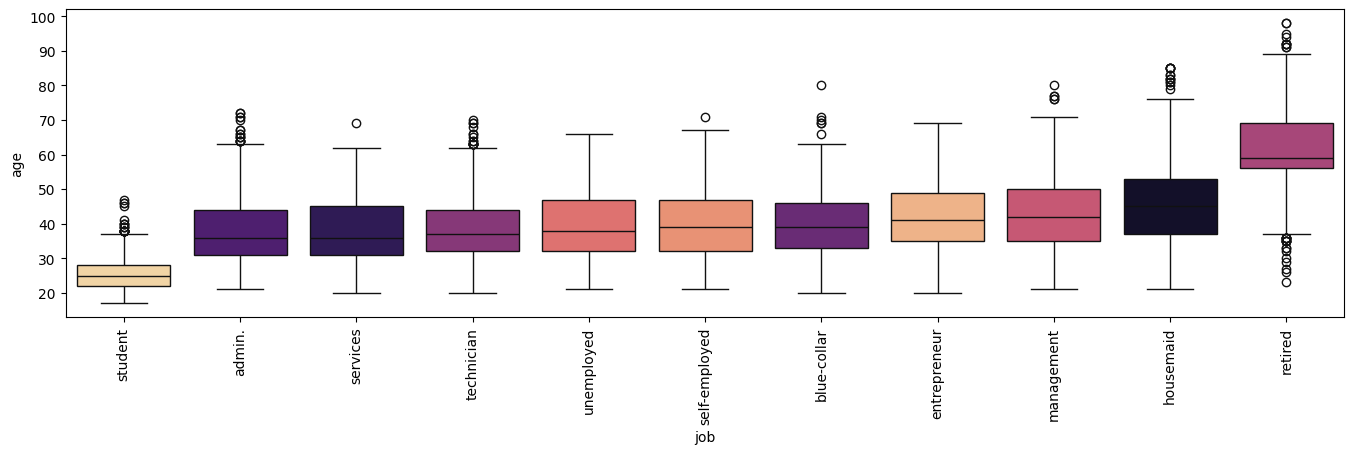

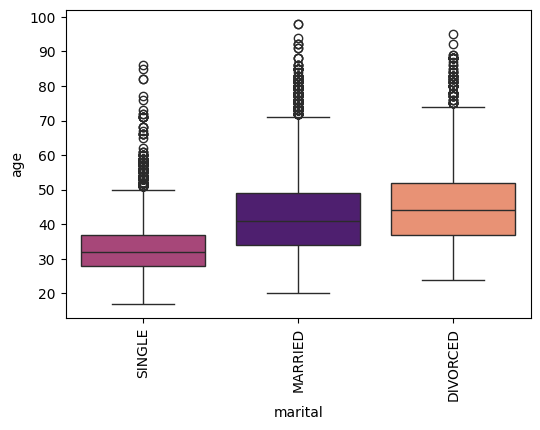

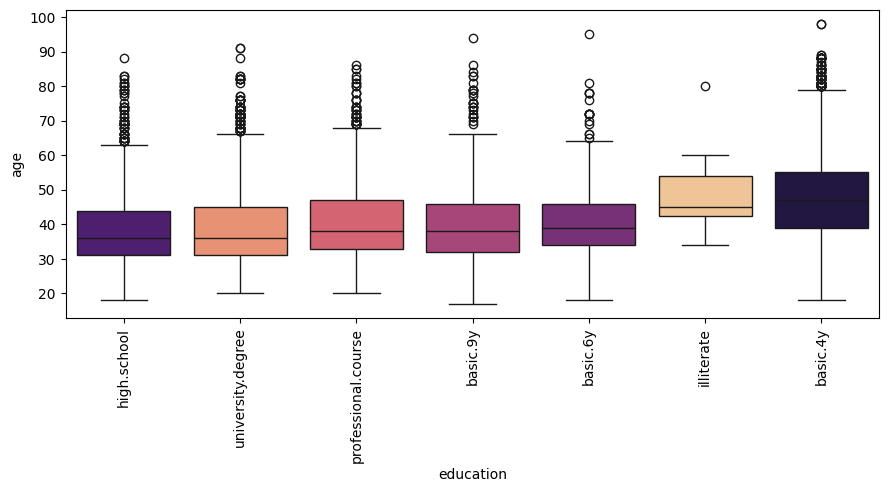

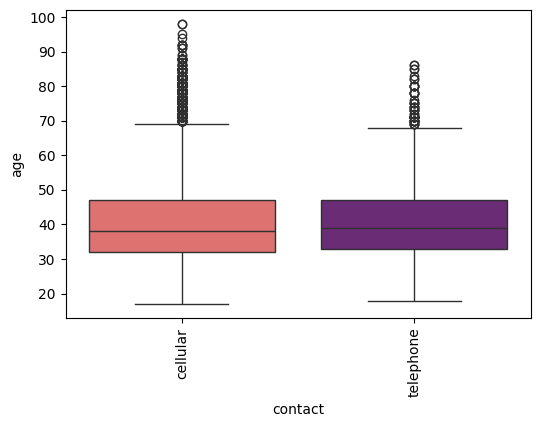

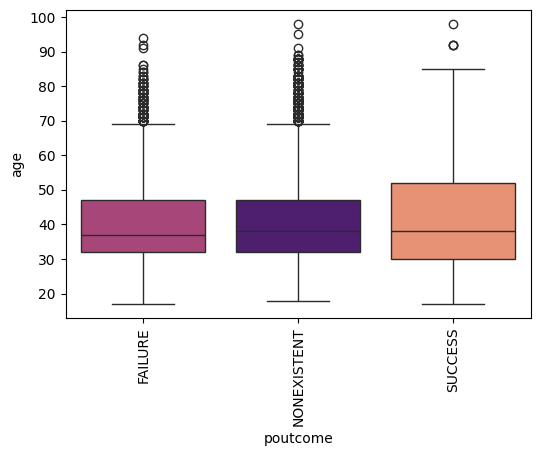

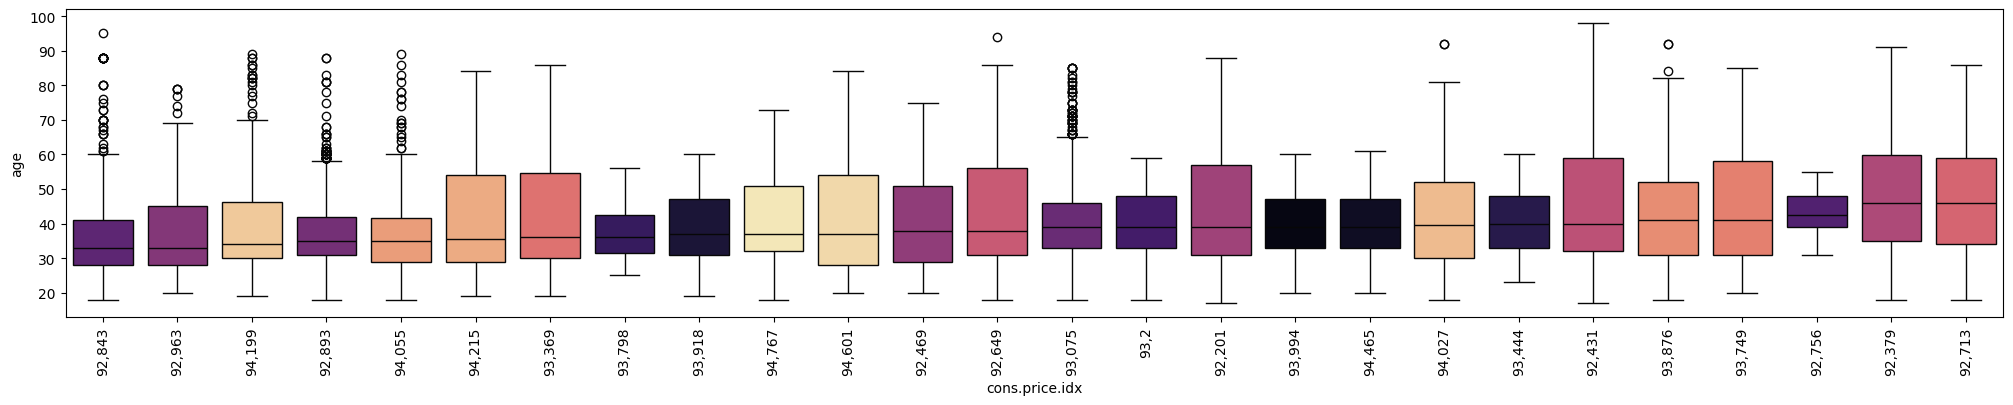

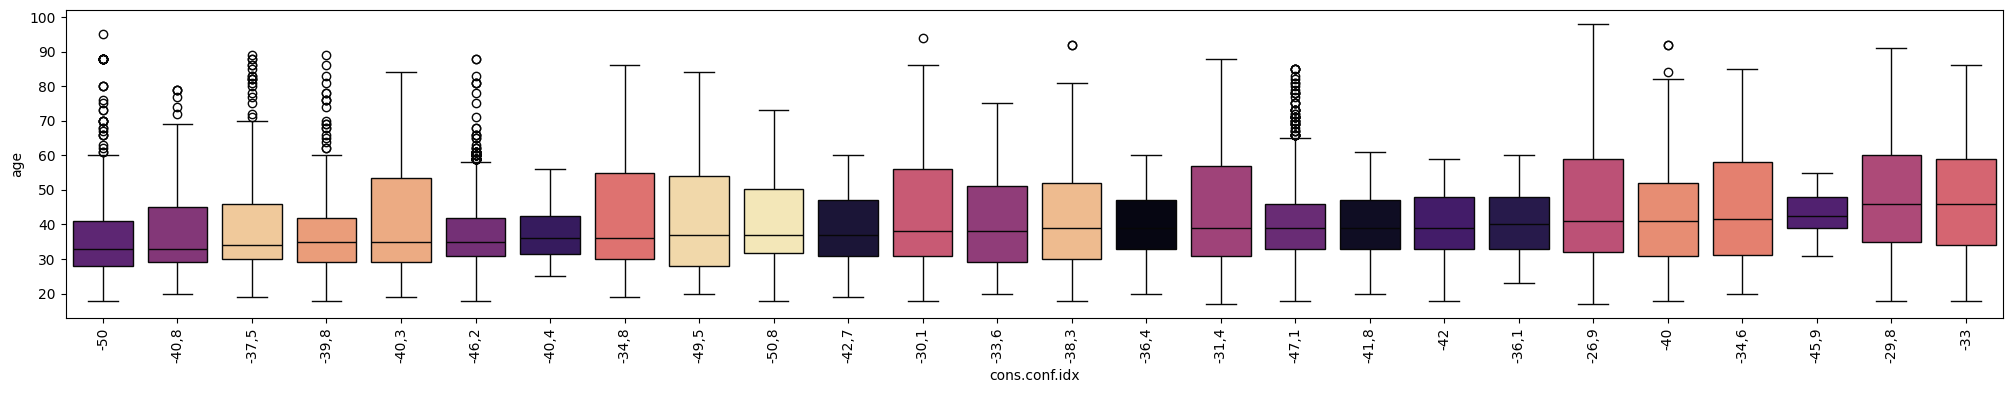

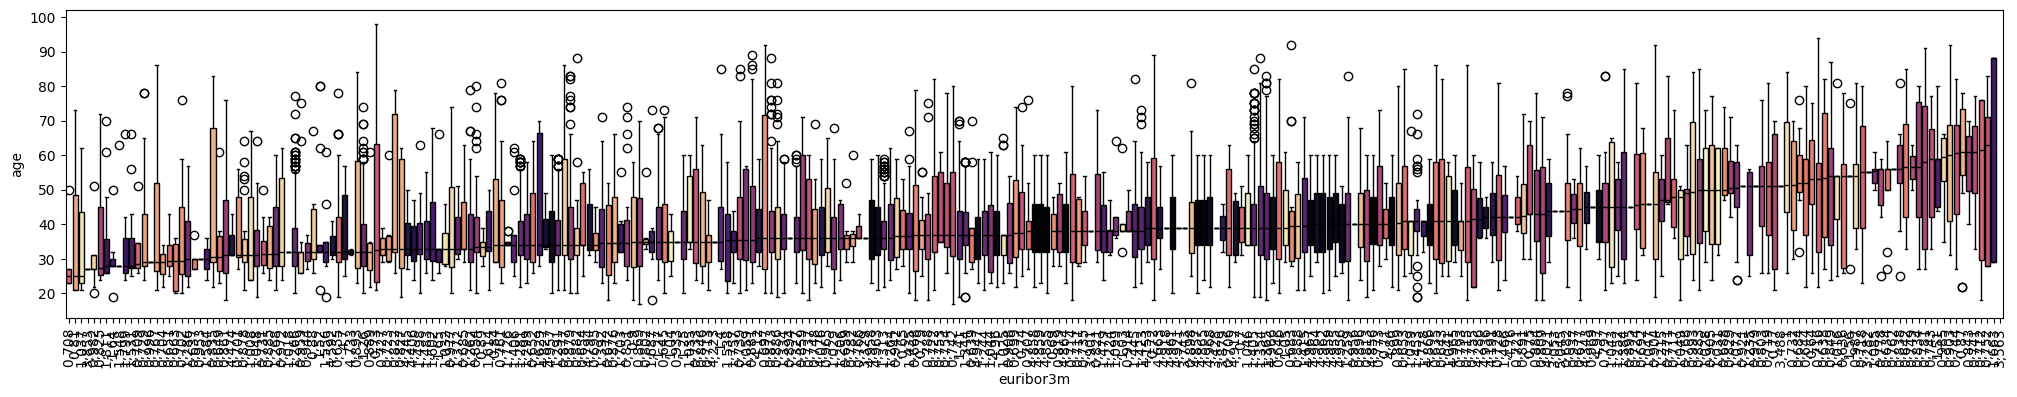

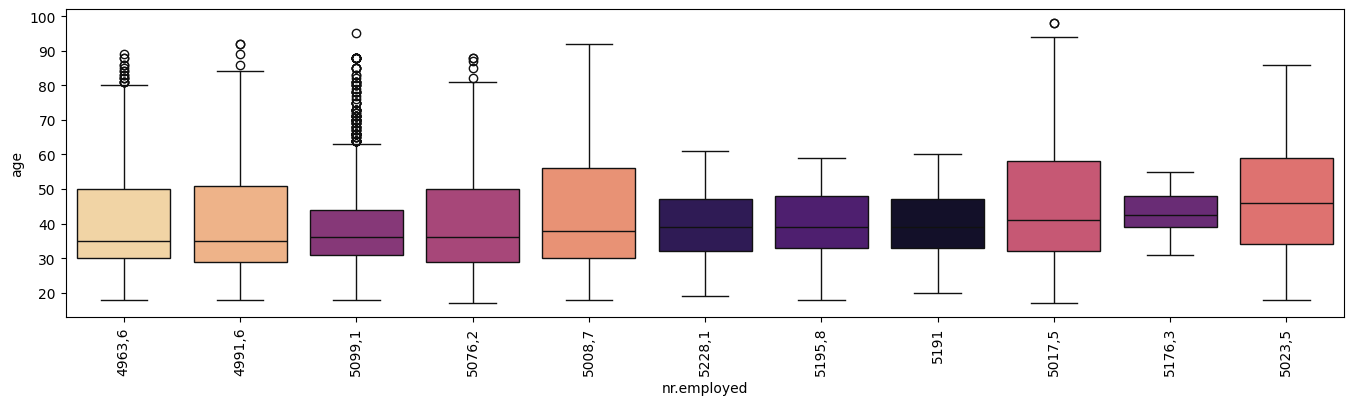

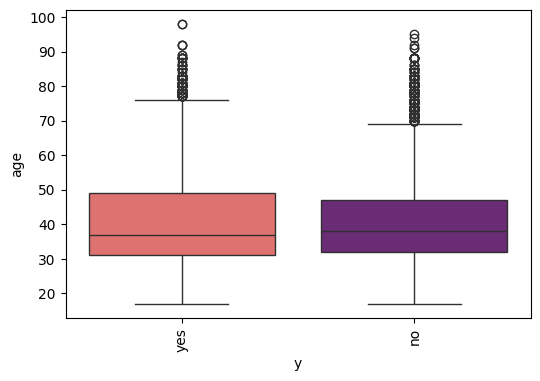

KeyboardInterrupt: 

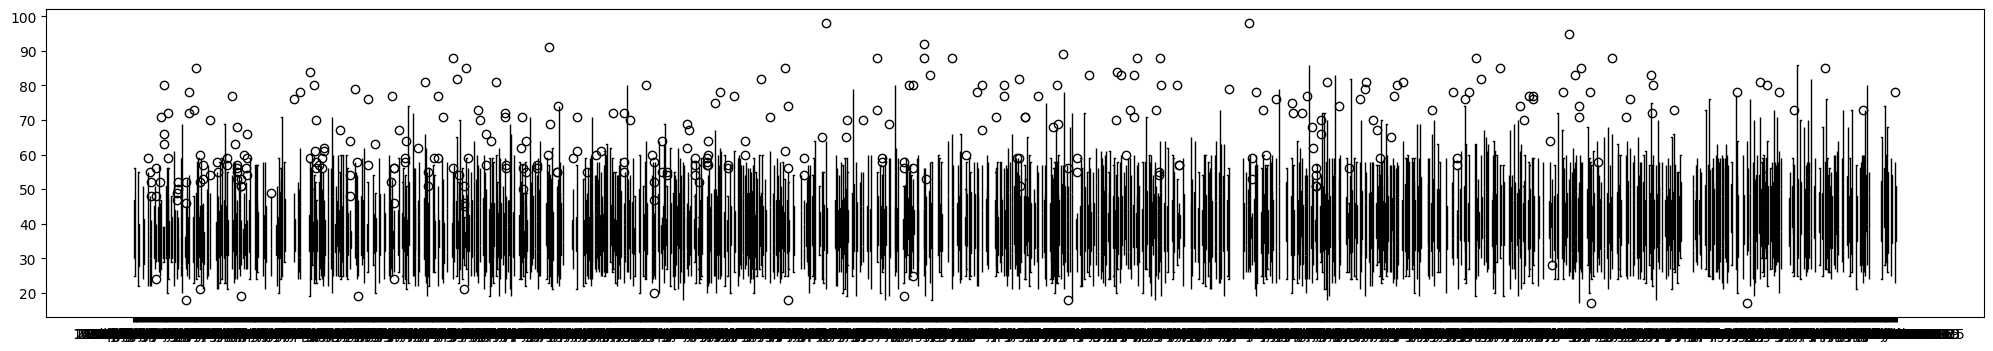

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

columna = 'age'

cols_cat = merged_df.select_dtypes(include='object').columns

# Generar boxplot
for col in cols_cat:

    # Calcular el número de categorías únicas
    num_cats = merged_df[col].nunique()

    # Ajustar dinámicamente el tamaño del gráfico
    fig_width = min(max(6, num_cats * 1.5), 25)  # Ancho mínimo de 6, máximo de 25
    fig_height = 4

    # Añadir orden
    orden = merged_df.groupby(col)[columna].median().sort_values().index

    plt.figure(figsize=(fig_width, fig_height))
    sns.boxplot(x=merged_df[col], y=merged_df[columna], order=orden, hue=merged_df[col], legend=False, palette='magma')
    plt.xticks(rotation=90)

    plt.show()


C:\Users\Noeli\AppData\Local\Temp\ipykernel_16844\2841278885.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout ()


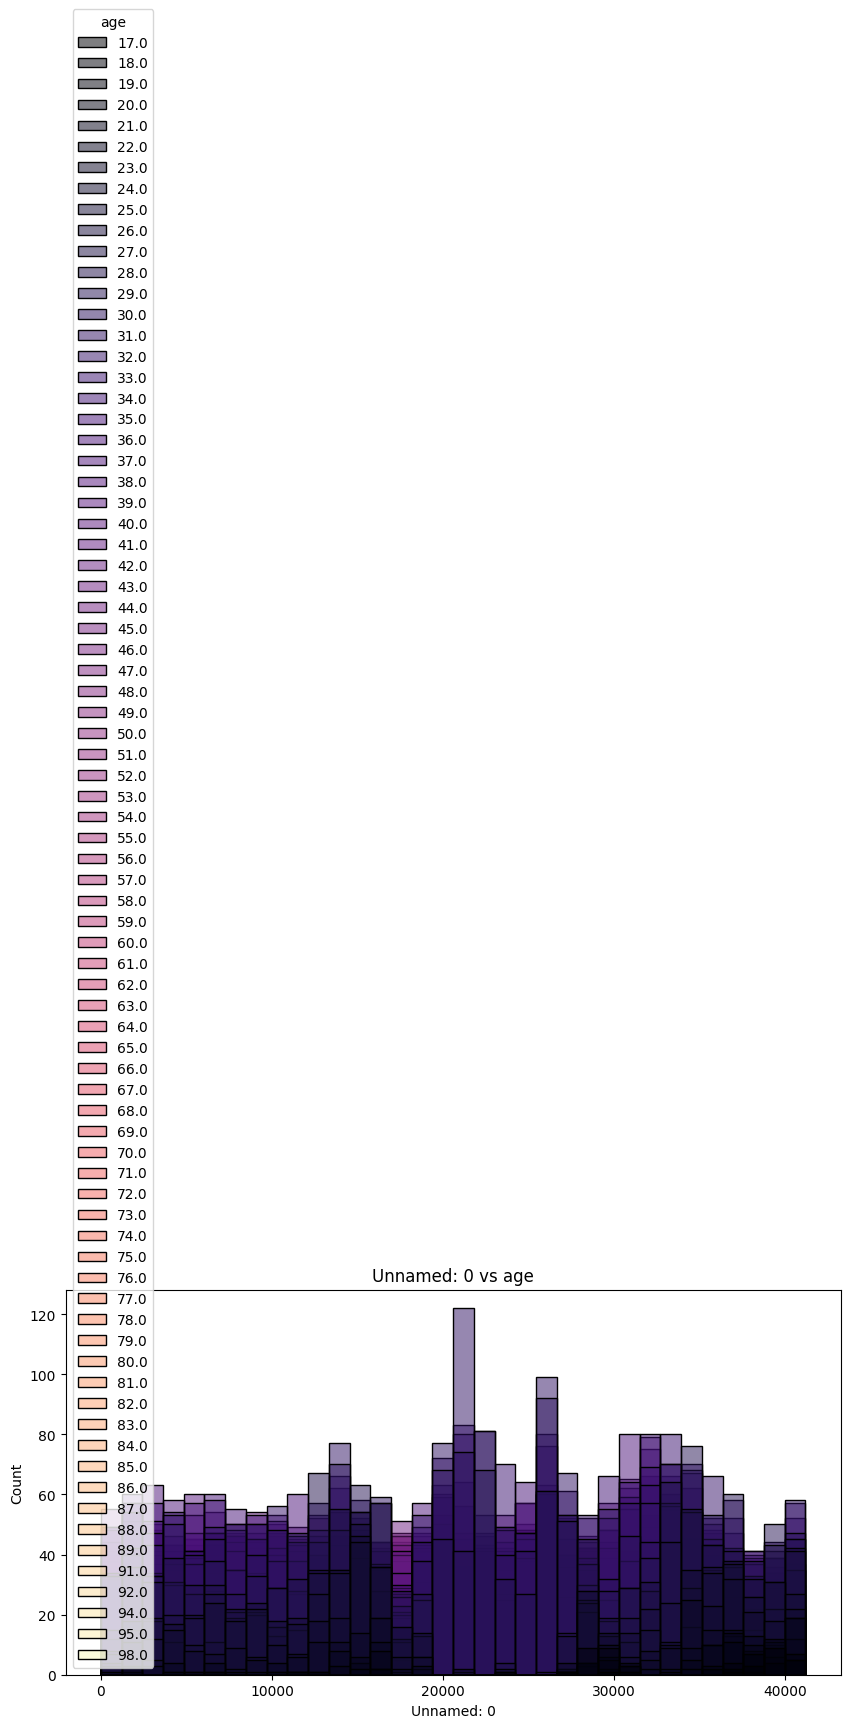

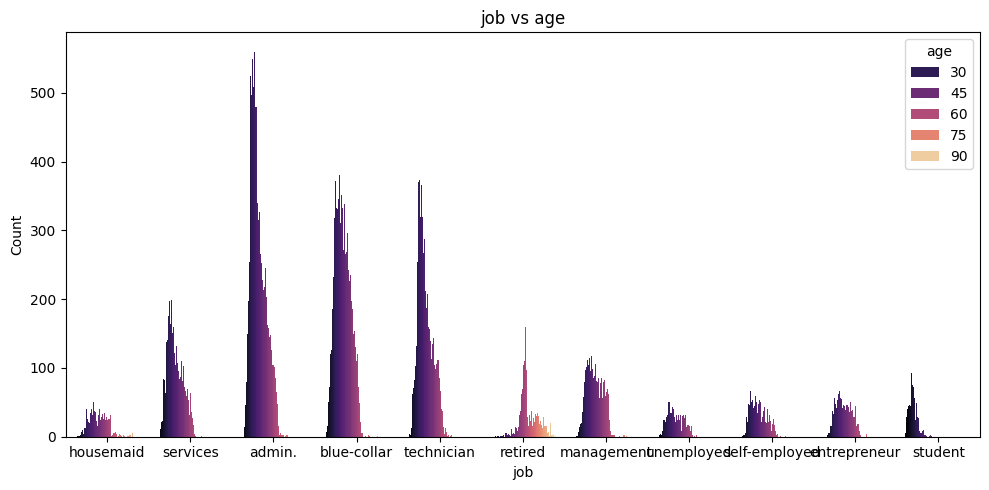

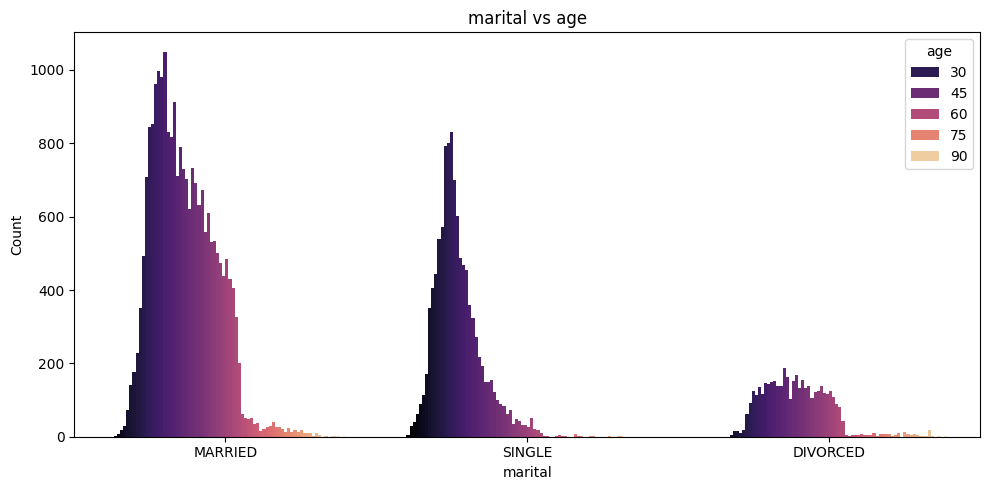

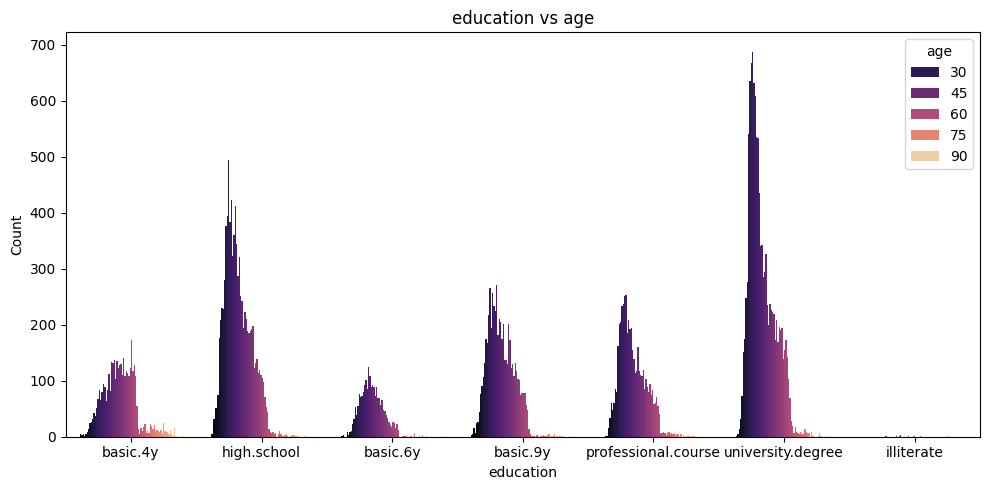

C:\Users\Noeli\AppData\Local\Temp\ipykernel_16844\2841278885.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout ()
C:\Users\Noeli\AppData\Local\Temp\ipykernel_16844\2841278885.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout ()
C:\Users\Noeli\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


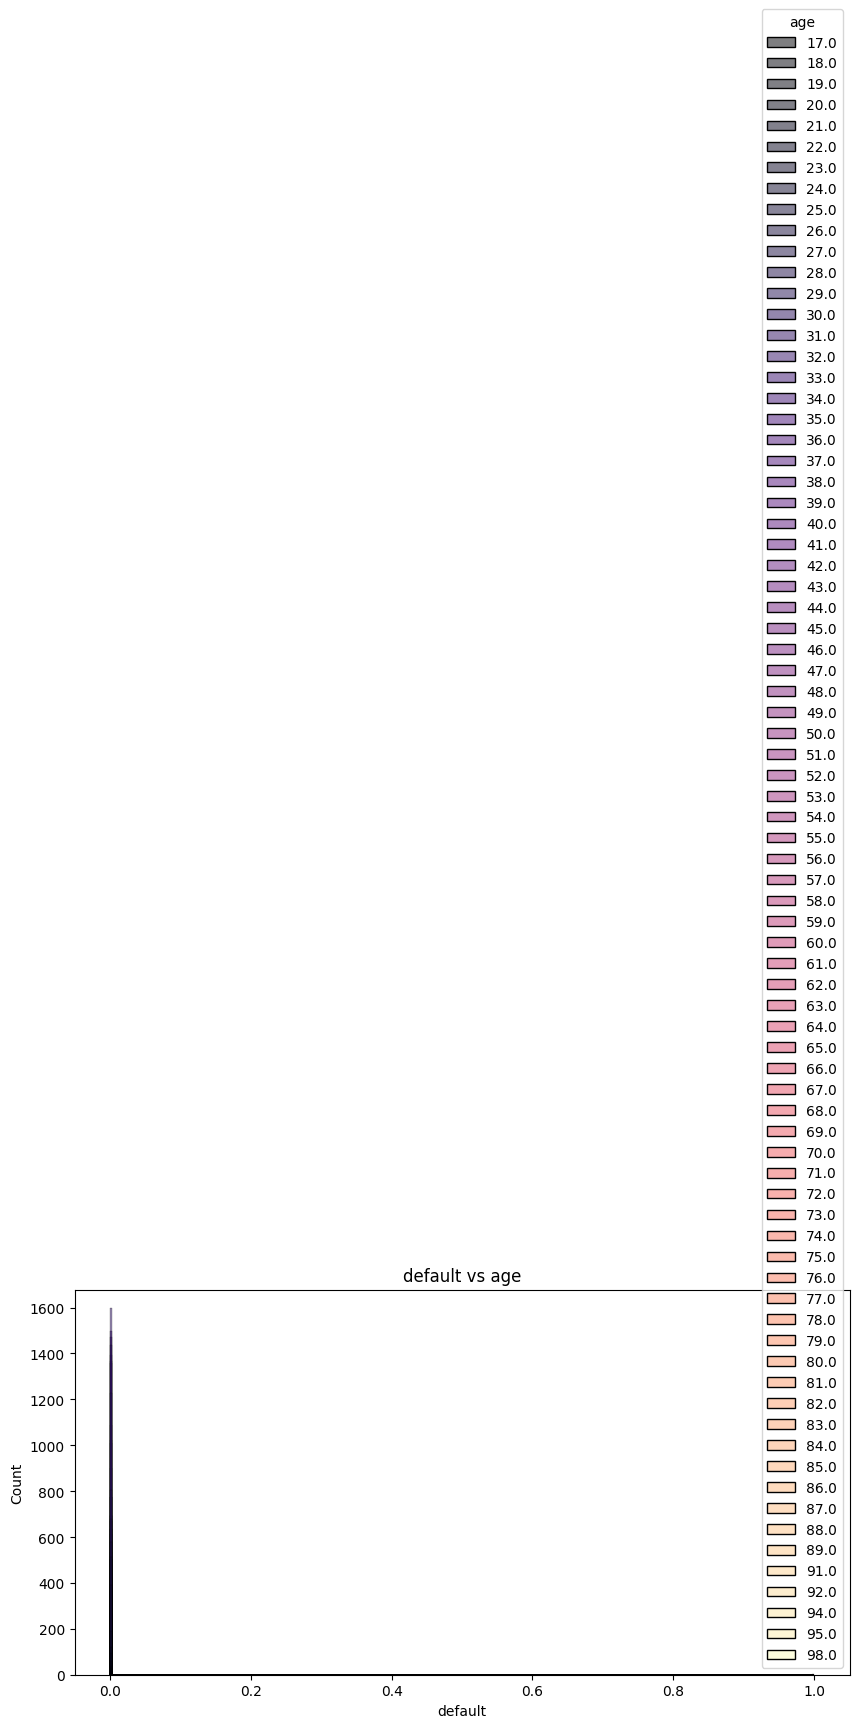

C:\Users\Noeli\AppData\Local\Temp\ipykernel_16844\2841278885.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout ()


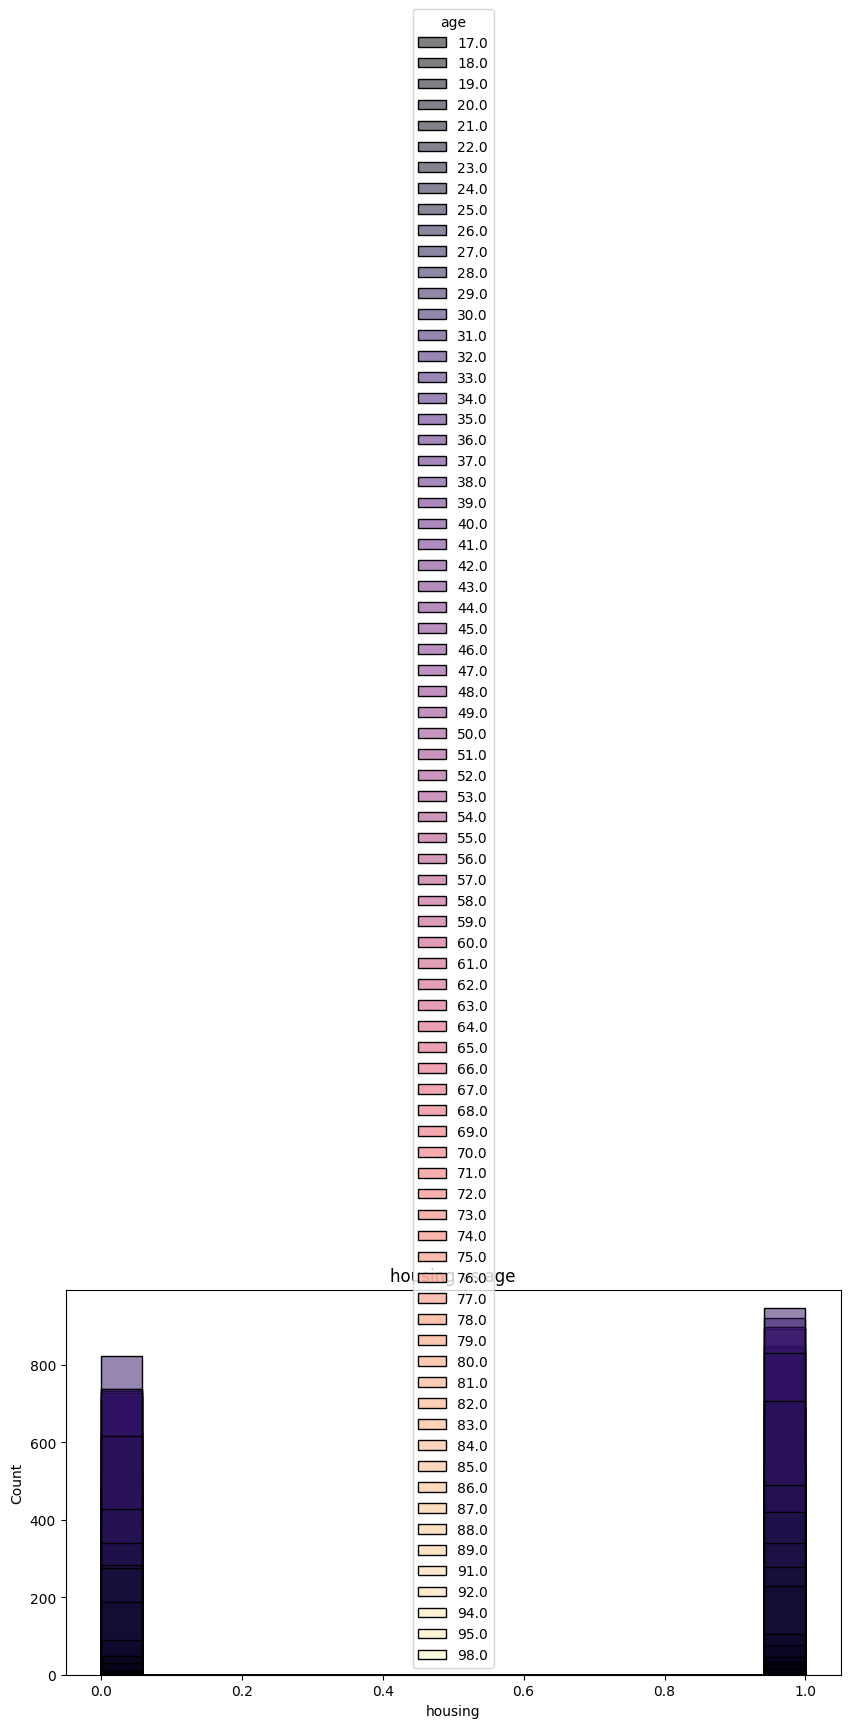

C:\Users\Noeli\AppData\Local\Temp\ipykernel_16844\2841278885.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout ()
C:\Users\Noeli\AppData\Local\Temp\ipykernel_16844\2841278885.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout ()
C:\Users\Noeli\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


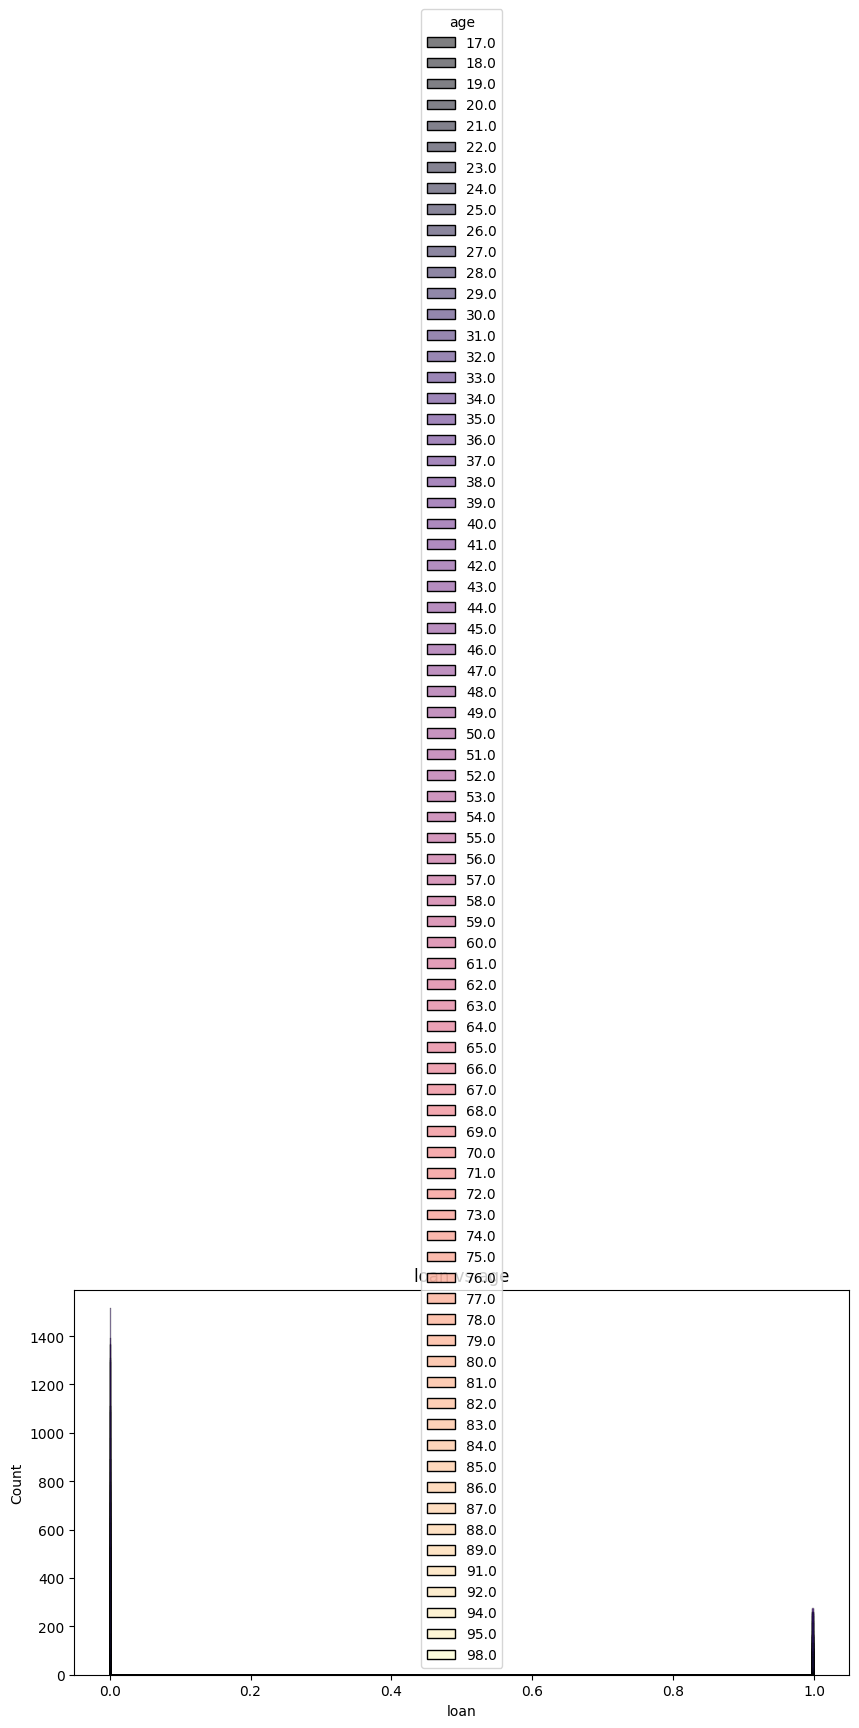

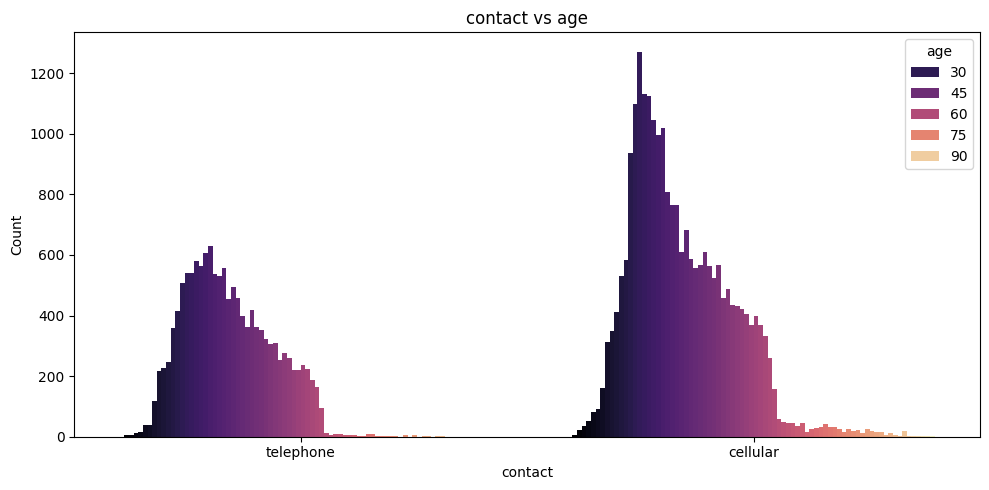

In [ ]:
# Definir la variable objetivo
columna = 'age'

for col in merged_df.columns:
# Saltar la variable objetivo
    if col == columna:
        continue

    plt.figure(figsize=(10, 5))

    if col in col_num:
        sns.histplot(x=merged_df[col], hue=merged_df[columna], palette="magma", legend=True)
    elif col in col_cat:
        sns.countplot(x=merged_df[col], hue=merged_df [columna], palette="magma")

    plt.title(f"{col} vs {columna}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout ()
    plt.show()


## Análisis de inconsistencias

In [ ]:
# minuto 48:40 del Nuestro primer EDA con un dataset en Excel o CSV Parte 5
